In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [4]:
train.shape

(1168, 81)

There are 1168 rows and 81 columns in  train dataset.

In [5]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [6]:
test.shape

(292, 80)

Test dataset has 292 rows and 80 column.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

SalePrice would be the target feature. Id would be a general identification feature. There are multiple columns with null values.

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

# Understanding Data

Let's look at our target feature

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

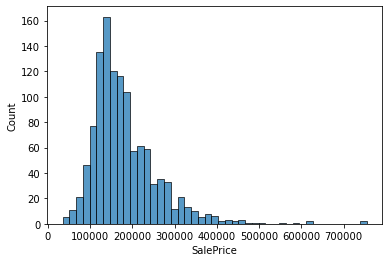

In [9]:
sns.histplot(train['SalePrice'])

<AxesSubplot:xlabel='SalePrice'>

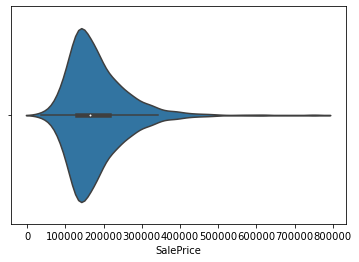

In [10]:
sns.violinplot(train['SalePrice'])

Most of the houses are between 34900 and 3,00,000.

In [11]:
train['SalePrice'].describe()

count      1168.000000
mean     181477.005993
std       79105.586863
min       34900.000000
25%      130375.000000
50%      163995.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

So the minimum price is 34900 and the  maximum price is 755000 and looking at the histogram, there are more houses with less price that costly houses.

Let's understand the object data .

In [12]:
print(train.select_dtypes(include=['object']).columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [13]:
print(train.select_dtypes(include=['int64']).columns)

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [14]:
print(train.select_dtypes(include=['float64']).columns)

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')


## **Initial thoughts and assumptions**<br>
There are huge number of features(80) to work on. Object type will have categorical data, so we will need to encode them and look at the feature importance with respect to SalePrice.<br>
Integer data type columns will have only integers. Yes, there may be some columns with same integer value. If we come across any such column we will remove of drop them as it will not be useful.<br>
Same would be with Float data type columns. <br>

We will assume that house with more space to offer, a greater number of rooms, more garage space for parking, additional space for swimming pools or gardens etc will be costlier. Also, the year of built any restorations may add more amount to the sale price.

# EDA AND PREPROCESSING

We will drop Id as this would only be the identification for the house in the dataset. We will also look at integer data type columns.

In [15]:
train.drop('Id', axis='columns', inplace=True)

In [16]:
test.drop('Id', axis='columns', inplace=True)

## MSSubClass

In [17]:
train['MSSubClass'].unique()

array([120,  20,  60,  50,  70,  30, 160,  85,  45,  90,  40,  80, 190,
        75, 180], dtype=int64)

So this column is a categorical column.

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

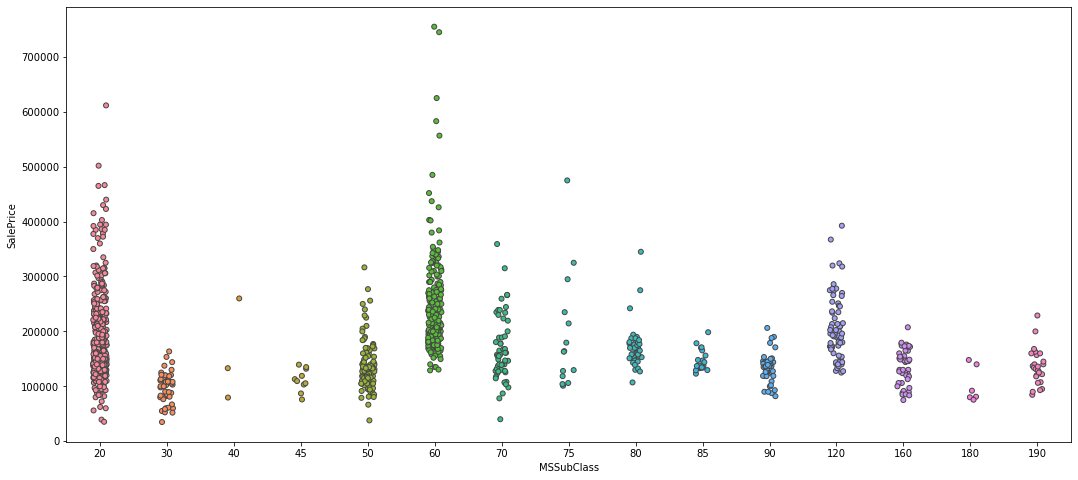

In [18]:
plt.figure(figsize=(18,8))
sns.stripplot(train['MSSubClass'],train['SalePrice'], linewidth=1)

In [19]:
train['MSSubClass'].value_counts()

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64

Most of the houses fall under 20, then 60, then 50 and highest price is for MSSubClass with 60 and 20.

## LotArea

In [20]:
train['LotArea'].describe()

count      1168.000000
mean      10484.749144
std        8957.442311
min        1300.000000
25%        7621.500000
50%        9522.500000
75%       11515.500000
max      164660.000000
Name: LotArea, dtype: float64

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

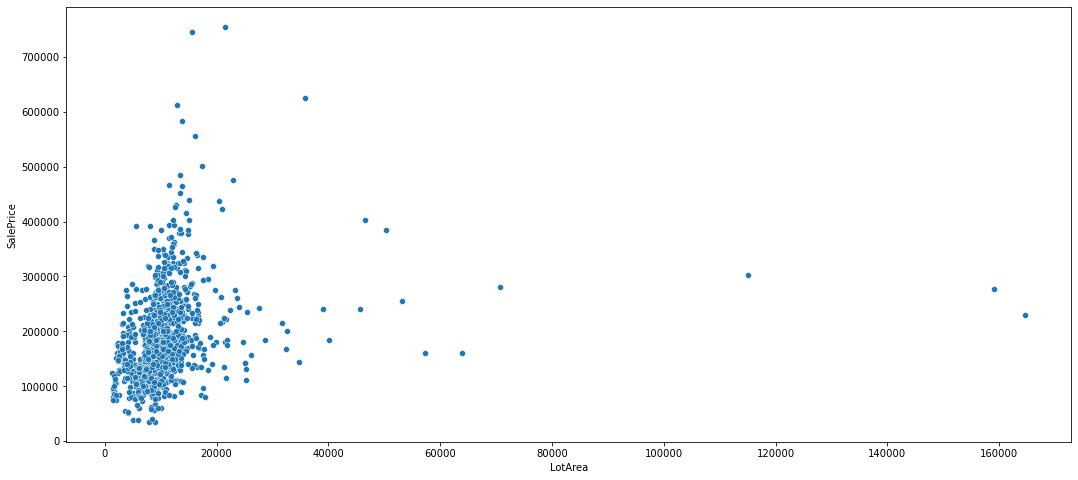

In [21]:
plt.figure(figsize=(18,8))
sns.scatterplot(train['LotArea'],train['SalePrice'])

<AxesSubplot:xlabel='LotArea'>

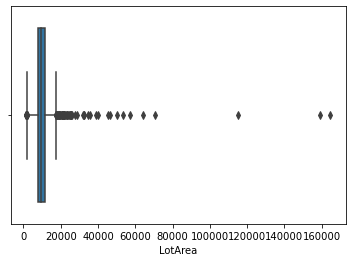

In [22]:
sns.boxplot(train['LotArea'])

As the lot area increases the price of the houses increases. However, there are few outliers in the data.<br>
The increase in the price is close to vertrical from 1000-20,000.

## OverallQual

In [23]:
train['OverallQual'].unique()

array([ 6,  8,  7,  5,  9,  1,  2,  4,  3, 10], dtype=int64)

This is also a categorical feature.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

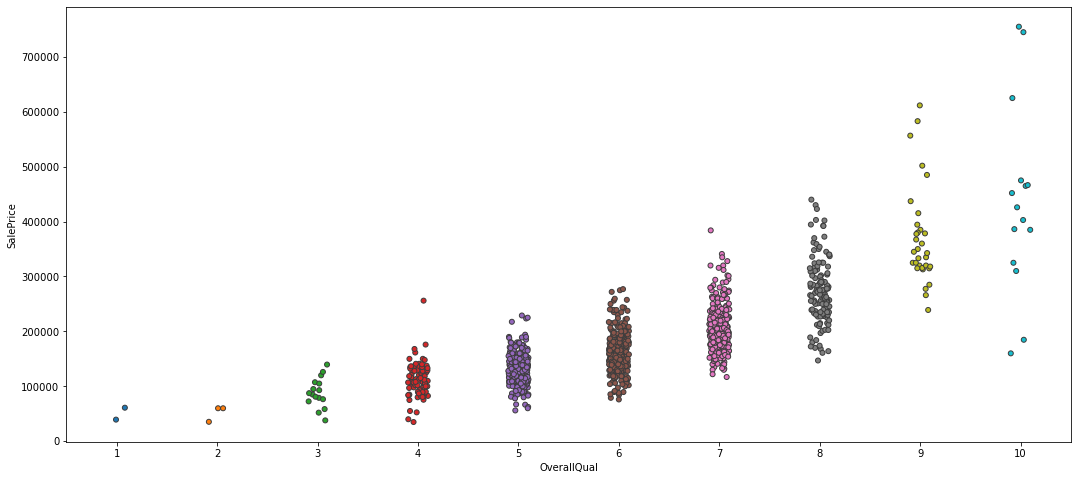

In [24]:
plt.figure(figsize=(18,8))
sns.stripplot(train['OverallQual'],train['SalePrice'], linewidth=1)

In [25]:
train['OverallQual'].value_counts()

5     314
6     295
7     260
8     138
4      93
9      32
3      16
10     15
2       3
1       2
Name: OverallQual, dtype: int64

As the OverallQual integer value increases the SalePrice also increasing. However, there are more houses in 5, 6 and 7 OverallQual feature

## OverallCond

In [26]:
train['OverallCond'].unique()

array([5, 6, 7, 4, 8, 2, 3, 9, 1], dtype=int64)

This also is a categorical feature.

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

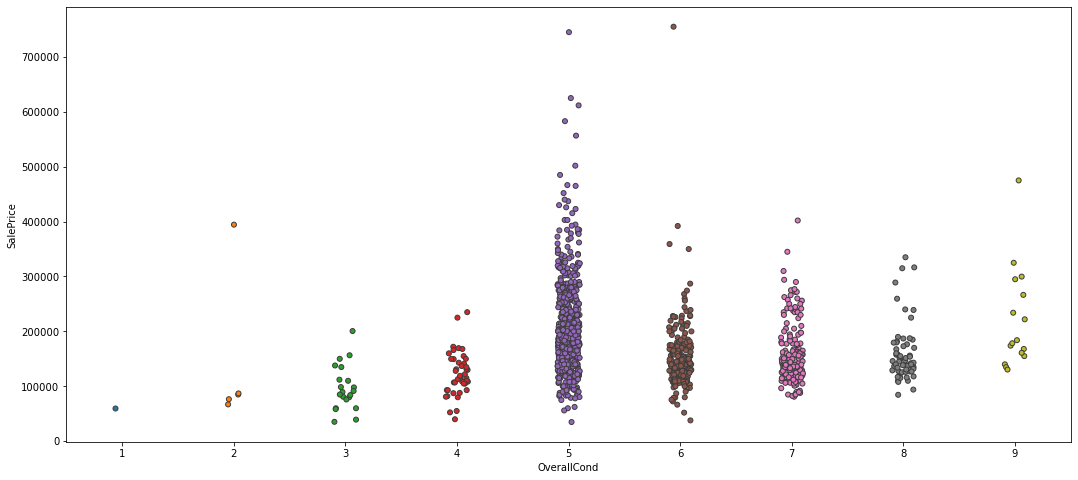

In [27]:
plt.figure(figsize=(18,8))
sns.stripplot(train['OverallCond'],train['SalePrice'], linewidth=1)

In [28]:
train['OverallCond'].value_counts()

5    640
6    209
7    172
8     61
4     43
3     21
9     16
2      5
1      1
Name: OverallCond, dtype: int64

The sale price with OverallCond with 5 has more SalePrice and more entries.

## YearBuilt

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

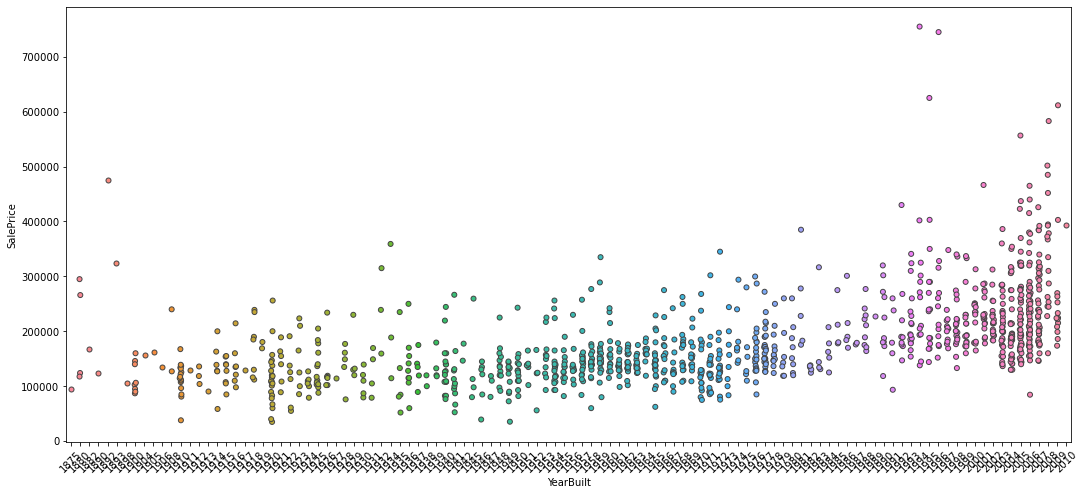

In [29]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=45)
sns.stripplot(train['YearBuilt'],train['SalePrice'], linewidth=1)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

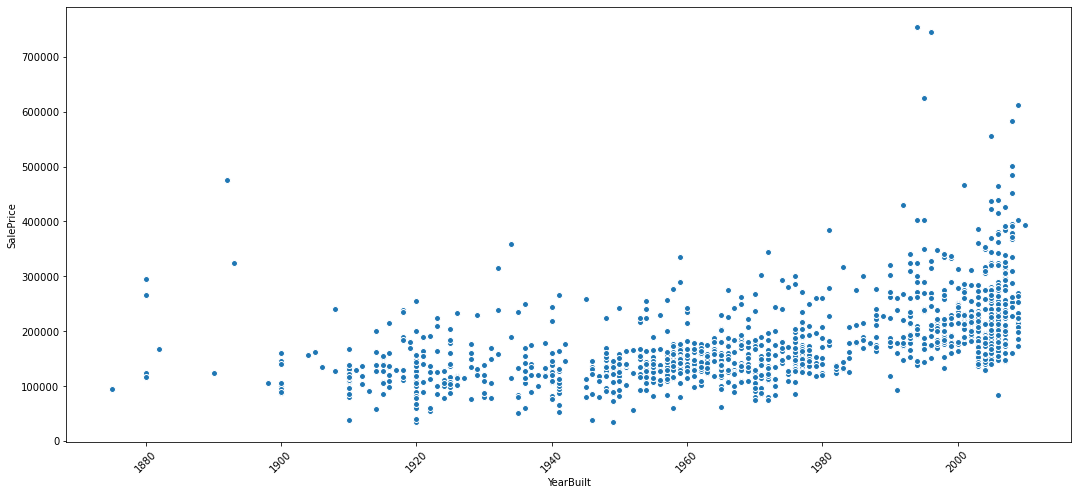

In [30]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=45)
sns.scatterplot(train['YearBuilt'],train['SalePrice'], linewidth=1)

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

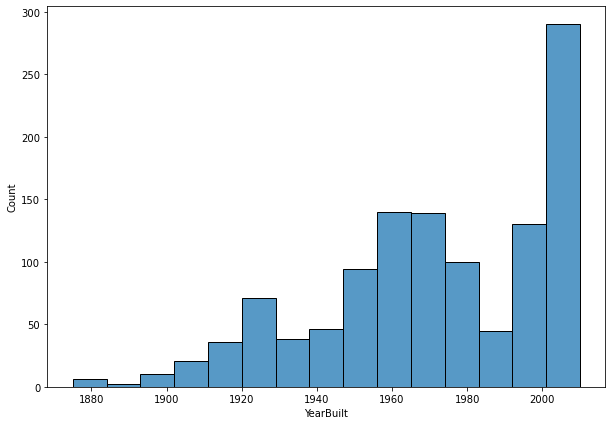

In [31]:
plt.figure(figsize=(10,7))
sns.histplot(train['YearBuilt'], bins=15)

There is a slight elivation in sale price as the year built decreases and there are more houses built after year 2000.

In [32]:
train['YearOld'] = 2021 - train['YearBuilt']
test['YearOld'] = 2021 - test['YearBuilt']

In [33]:
train.drop('YearBuilt', axis='columns',inplace=True)
test.drop('YearBuilt', axis='columns',inplace=True)

## YearRemodAdd

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

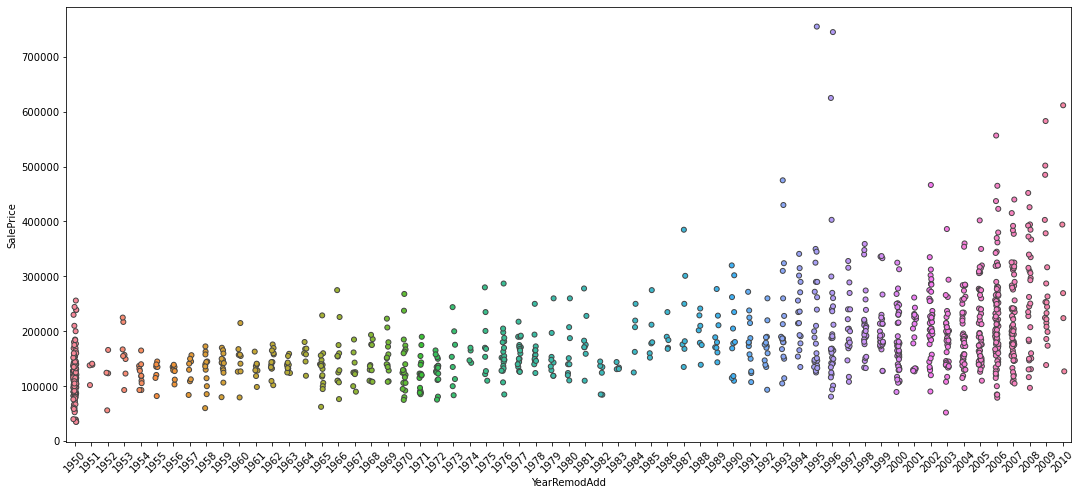

In [34]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=45)
sns.stripplot(train['YearRemodAdd'],train['SalePrice'], linewidth=1)

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

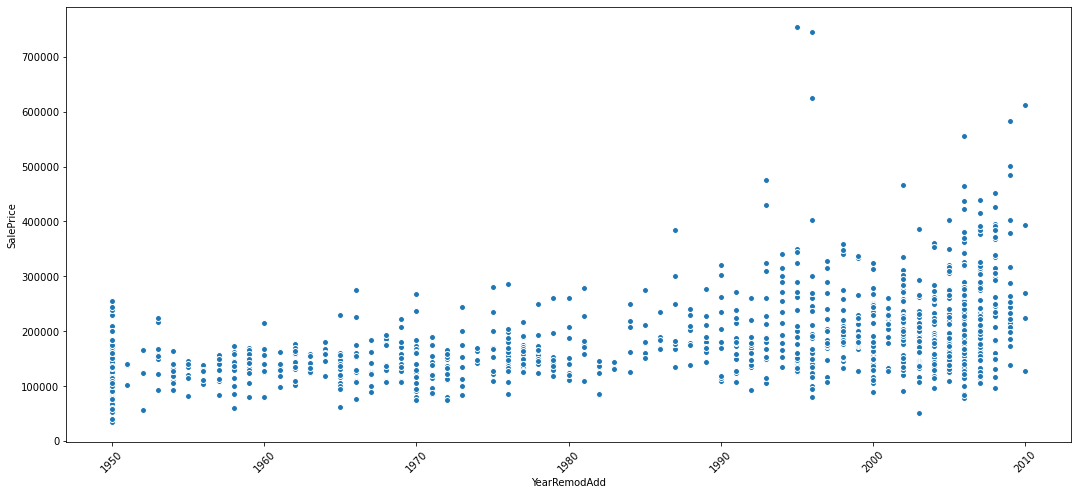

In [35]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=45)
sns.scatterplot(train['YearRemodAdd'],train['SalePrice'], linewidth=1)

<AxesSubplot:xlabel='YearRemodAdd', ylabel='Count'>

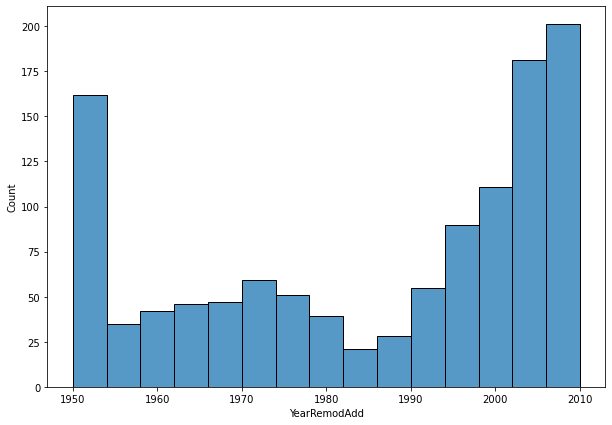

In [36]:
plt.figure(figsize=(10,7))
sns.histplot(train['YearRemodAdd'], bins=15)

In [37]:
train['YearRemod'] = 2021 - train['YearRemodAdd']
test['YearRemod'] = 2021 - test['YearRemodAdd']

In [38]:
train.drop('YearRemodAdd', axis='columns',inplace=True)
test.drop('YearRemodAdd', axis='columns',inplace=True)

Same is with YearRemodAdd feature.

## BsmtFinSF1

In [39]:
train['BsmtFinSF1'].describe()

count    1168.000000
mean      444.726027
std       462.664785
min         0.000000
25%         0.000000
50%       385.500000
75%       714.500000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='SalePrice'>

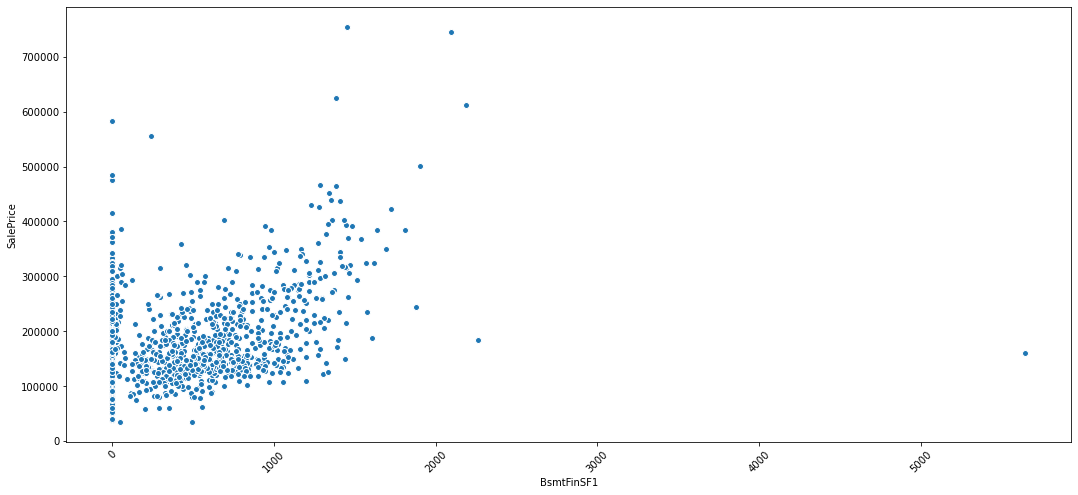

In [40]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=45)
sns.scatterplot(train['BsmtFinSF1'],train['SalePrice'], linewidth=1)

<AxesSubplot:xlabel='BsmtFinSF1'>

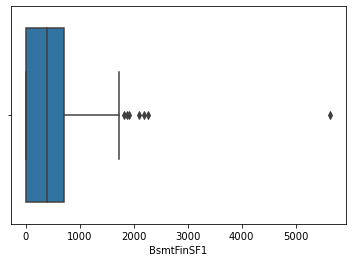

In [41]:
sns.boxplot(train['BsmtFinSF1'])

As BsmtFinSF1 increases the saleprice increases.

<AxesSubplot:xlabel='BsmtFinSF2', ylabel='SalePrice'>

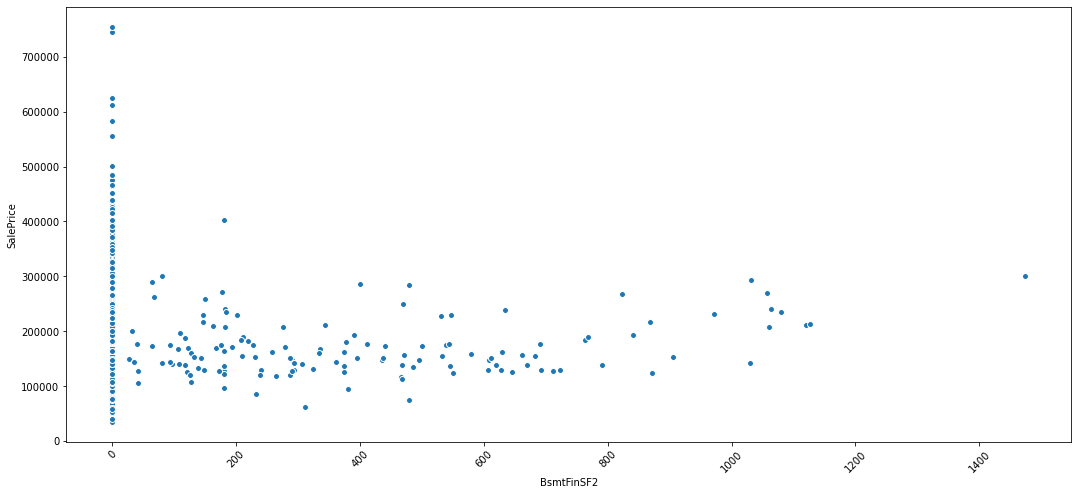

In [42]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=45)
sns.scatterplot(train['BsmtFinSF2'],train['SalePrice'], linewidth=1)

<AxesSubplot:xlabel='BsmtFinSF2'>

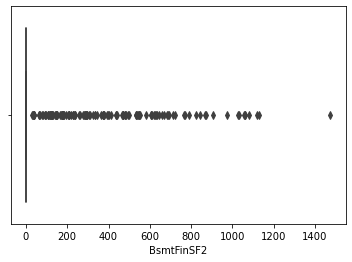

In [43]:
sns.boxplot(train['BsmtFinSF2'])

<AxesSubplot:xlabel='BsmtUnfSF', ylabel='SalePrice'>

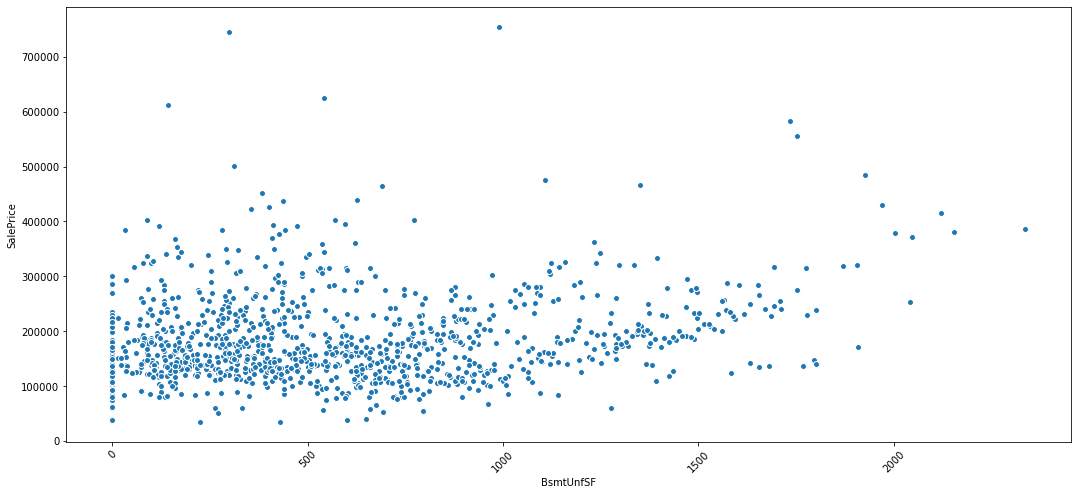

In [44]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=45)
sns.scatterplot(train['BsmtUnfSF'],train['SalePrice'], linewidth=1)

<AxesSubplot:xlabel='BsmtFinSF2'>

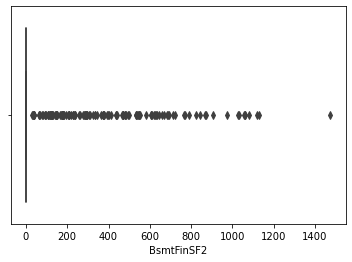

In [45]:
sns.boxplot(train['BsmtFinSF2'])

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

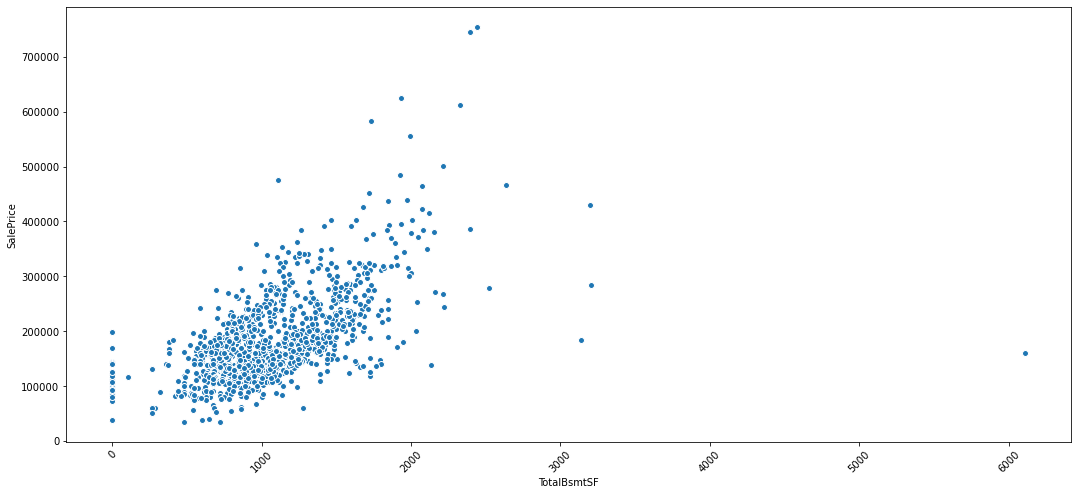

In [46]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=45)
sns.scatterplot(train['TotalBsmtSF'],train['SalePrice'], linewidth=1)

<AxesSubplot:xlabel='TotalBsmtSF'>

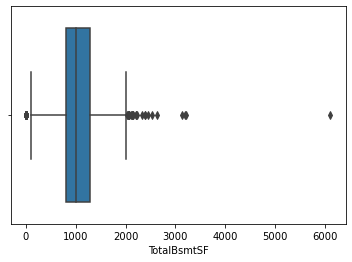

In [47]:
sns.boxplot(train['TotalBsmtSF'])

## 1stFlrSF

In [48]:
train['1stFlrSF'].describe()

count    1168.000000
mean     1169.860445
std       391.161983
min       334.000000
25%       892.000000
50%      1096.500000
75%      1392.000000
max      4692.000000
Name: 1stFlrSF, dtype: float64

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

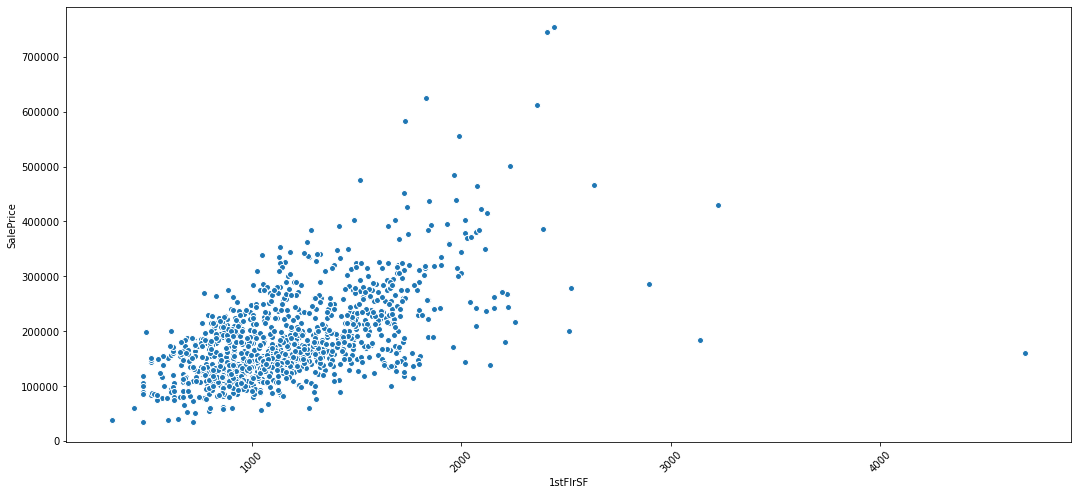

In [49]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=45)
sns.scatterplot(train['1stFlrSF'],train['SalePrice'], linewidth=1)

<AxesSubplot:xlabel='1stFlrSF'>

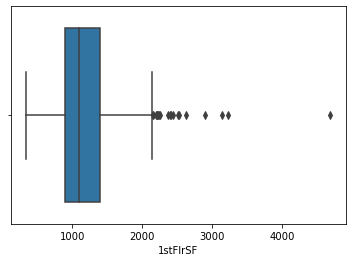

In [50]:
sns.boxplot(train['1stFlrSF'])

<AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>

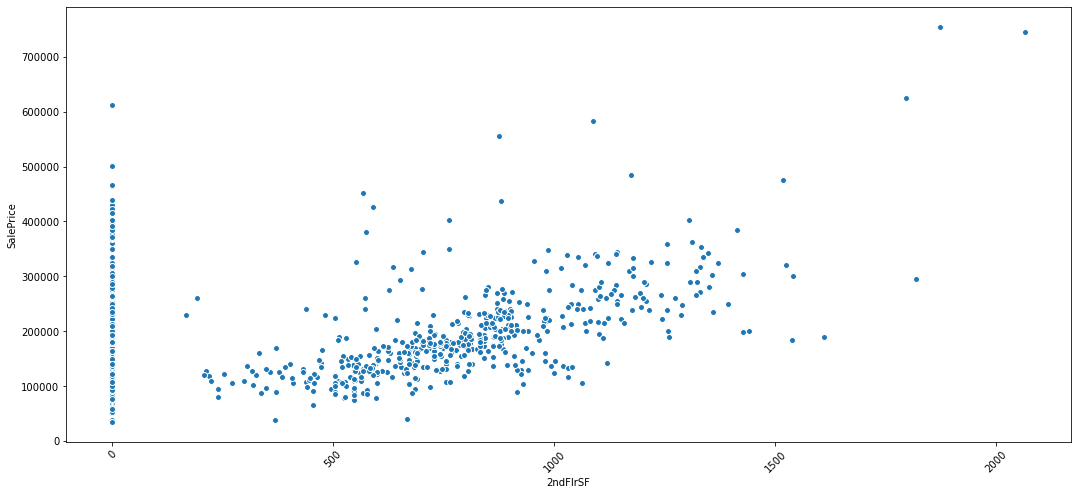

In [51]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=45)
sns.scatterplot(train['2ndFlrSF'],train['SalePrice'], linewidth=1)

## LowQualFinSF

In [52]:
train['LowQualFinSF'].unique()

array([  0, 528,  53, 156,  80, 390, 234, 144, 572, 360, 514, 120, 384,
       515, 481, 513, 232, 371, 473, 420, 392], dtype=int64)

In [53]:
test['LowQualFinSF'].unique()

array([  0, 397, 479, 205], dtype=int64)

In [54]:
train['LowQualFinSF'].value_counts()

0      1145
80        3
360       2
371       1
53        1
120       1
144       1
156       1
232       1
234       1
572       1
528       1
390       1
392       1
420       1
473       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64

In [55]:
test['LowQualFinSF'].value_counts()

0      289
479      1
397      1
205      1
Name: LowQualFinSF, dtype: int64

<AxesSubplot:xlabel='LowQualFinSF', ylabel='SalePrice'>

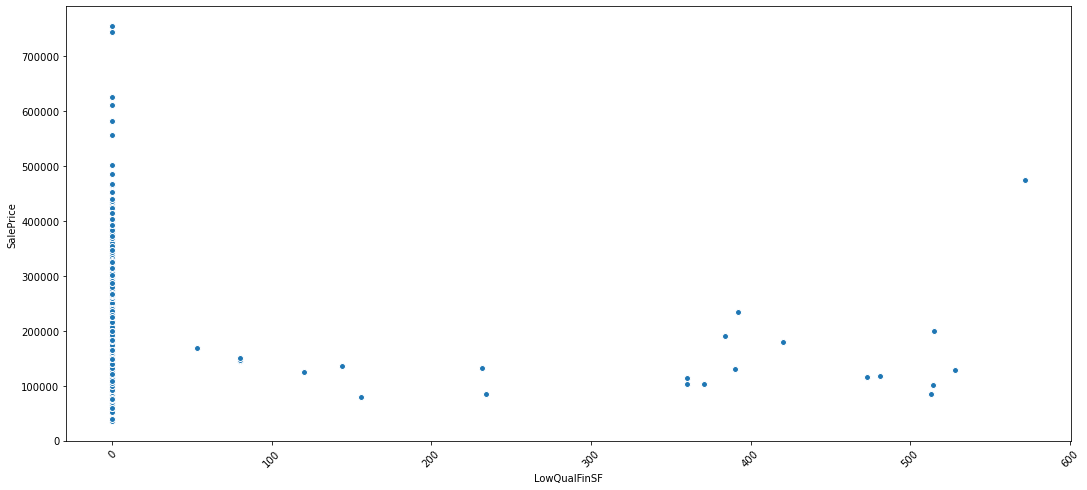

In [56]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=45)
sns.scatterplot(train['LowQualFinSF'],train['SalePrice'], linewidth=1)

As we know that LowQualFinSF has more entries with value 0, we will convert this feature into a two category feature.

In [57]:
def counted(int):
    if int != 0:
        return 1
    else:
        return 0

In [58]:
train['LowQualFinSF_trans'] = train['LowQualFinSF'].apply(counted)

In [59]:
test['LowQualFinSF_trans'] = test['LowQualFinSF'].apply(counted)

In [60]:
train.drop('LowQualFinSF', axis='columns', inplace=True)
test.drop('LowQualFinSF', axis='columns', inplace=True)

We have converted the LowQualFinSF feature and dropped them as well.

## GrLivArea

In [61]:
train['GrLivArea'].describe()

count    1168.000000
mean     1525.066781
std       528.042957
min       334.000000
25%      1143.250000
50%      1468.500000
75%      1795.000000
max      5642.000000
Name: GrLivArea, dtype: float64

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

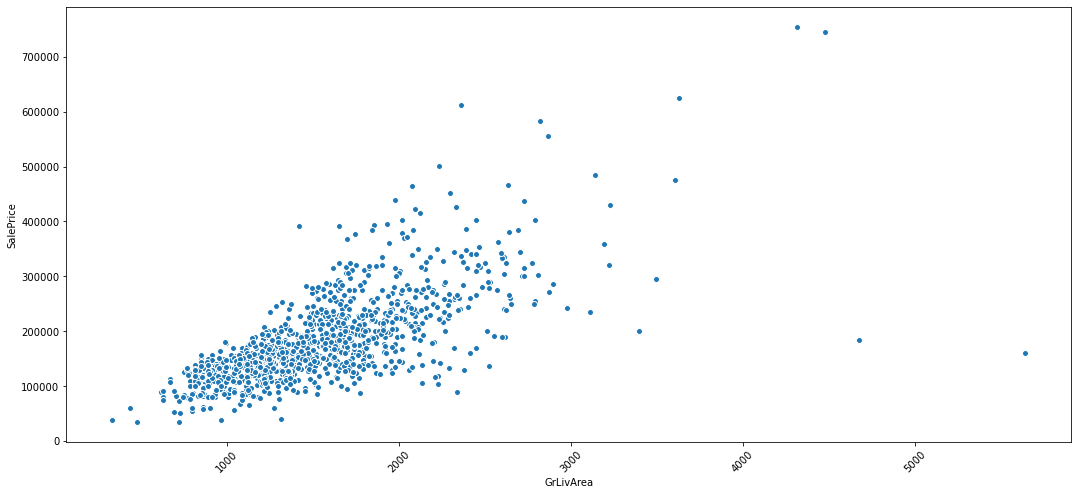

In [62]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=45)
sns.scatterplot(train['GrLivArea'],train['SalePrice'], linewidth=1)

<AxesSubplot:xlabel='GrLivArea'>

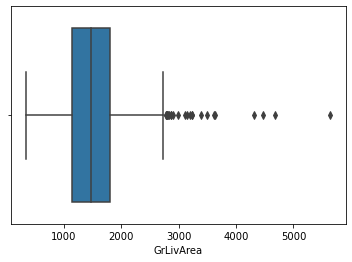

In [63]:
sns.boxplot(train['GrLivArea'])

As the GrLivArea increases the saleprice increases. Houses with more GrLivArea are costlier.

## BsmtFullBath

In [64]:
train['BsmtFullBath'].unique()

array([0, 1, 2, 3], dtype=int64)

In [65]:
train['BsmtFullBath'].value_counts()

0    686
1    468
2     13
3      1
Name: BsmtFullBath, dtype: int64

<AxesSubplot:xlabel='BsmtFullBath', ylabel='SalePrice'>

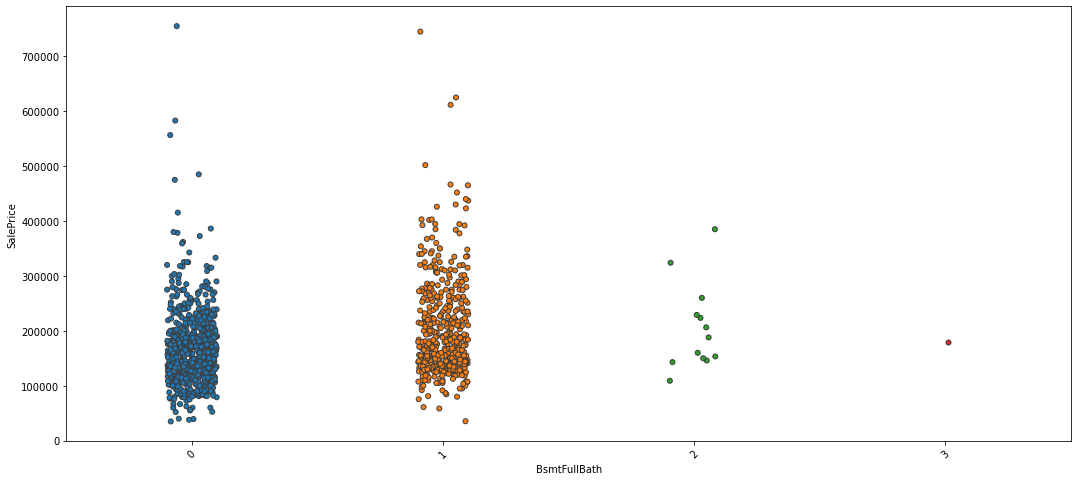

In [66]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=45)
sns.stripplot(train['BsmtFullBath'],train['SalePrice'], linewidth=1)

Houses with 0 and 1 BsmtFullBath slightly have same prices.

In [67]:
train['FullBath'].value_counts()

2    610
1    524
3     27
0      7
Name: FullBath, dtype: int64

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

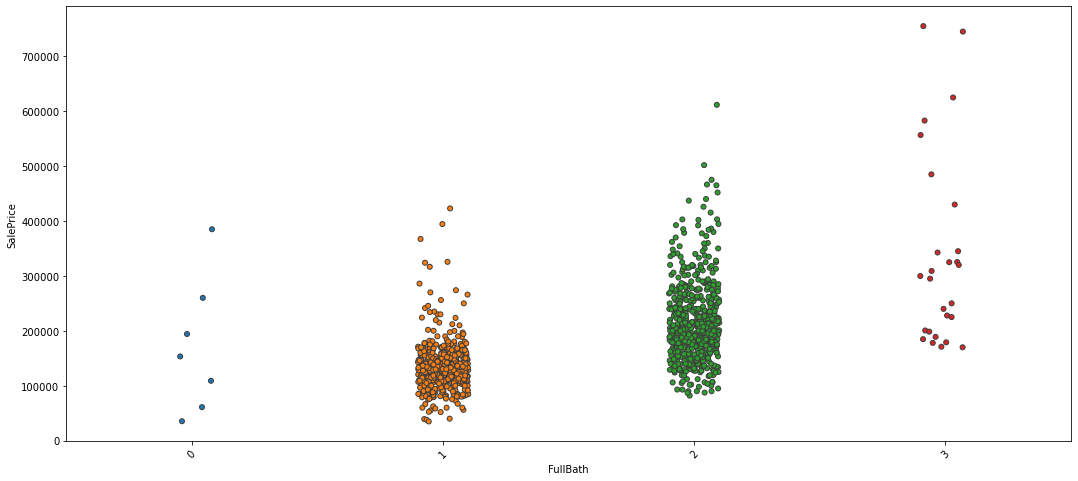

In [68]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=45)
sns.stripplot(train['FullBath'],train['SalePrice'], linewidth=1)

Houses with more FullBath has more sale prices.

In [69]:
train['HalfBath'].value_counts()

0    724
1    434
2     10
Name: HalfBath, dtype: int64

<AxesSubplot:xlabel='HalfBath', ylabel='SalePrice'>

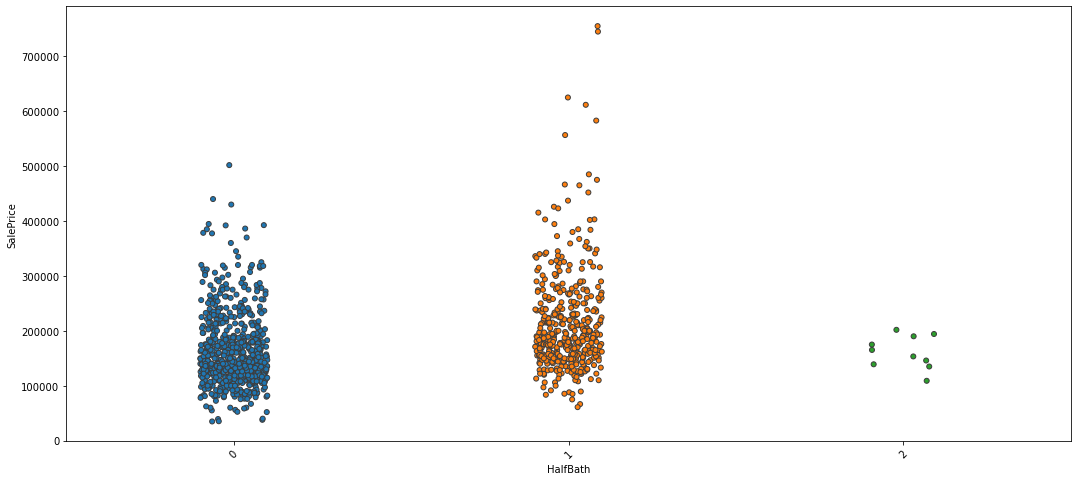

In [70]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=45)
sns.stripplot(train['HalfBath'],train['SalePrice'], linewidth=1)

Houses with 1 HalfBath adds more to SalePrice.

## BedroomAbvGr

In [71]:
train['BedroomAbvGr'].unique()

array([2, 4, 3, 1, 5, 0, 6, 8], dtype=int64)

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='SalePrice'>

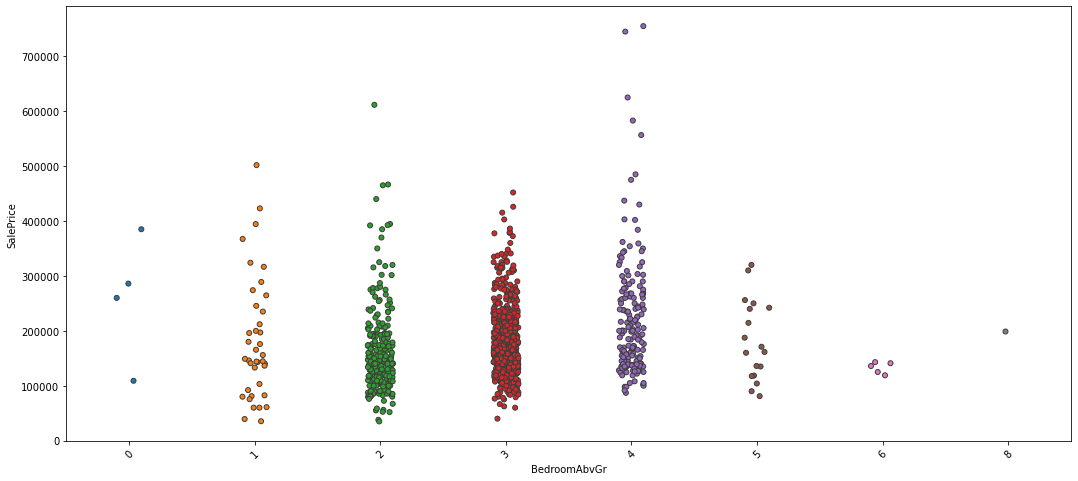

In [72]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=45)
sns.stripplot(train['BedroomAbvGr'],train['SalePrice'], linewidth=1)

In [73]:
train['BedroomAbvGr'].value_counts()

3    640
2    281
4    180
1     39
5     18
6      5
0      4
8      1
Name: BedroomAbvGr, dtype: int64

BedroomAbvGr value with 4 would be costliest.

In [74]:
train['KitchenAbvGr'].unique()

array([1, 2, 3, 0], dtype=int64)

<AxesSubplot:xlabel='KitchenAbvGr', ylabel='SalePrice'>

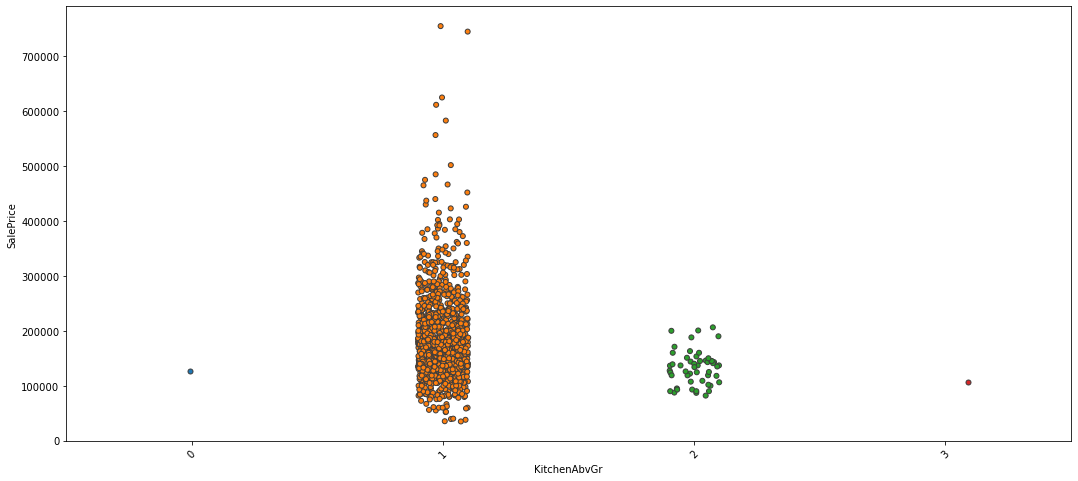

In [75]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=45)
sns.stripplot(train['KitchenAbvGr'],train['SalePrice'], linewidth=1)

In [76]:
train['KitchenAbvGr'].value_counts()

1    1114
2      52
3       1
0       1
Name: KitchenAbvGr, dtype: int64

In [77]:
test['KitchenAbvGr'].value_counts()

1    278
2     13
3      1
Name: KitchenAbvGr, dtype: int64

Houses with 1 KitchenAbvGr are costlier.

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

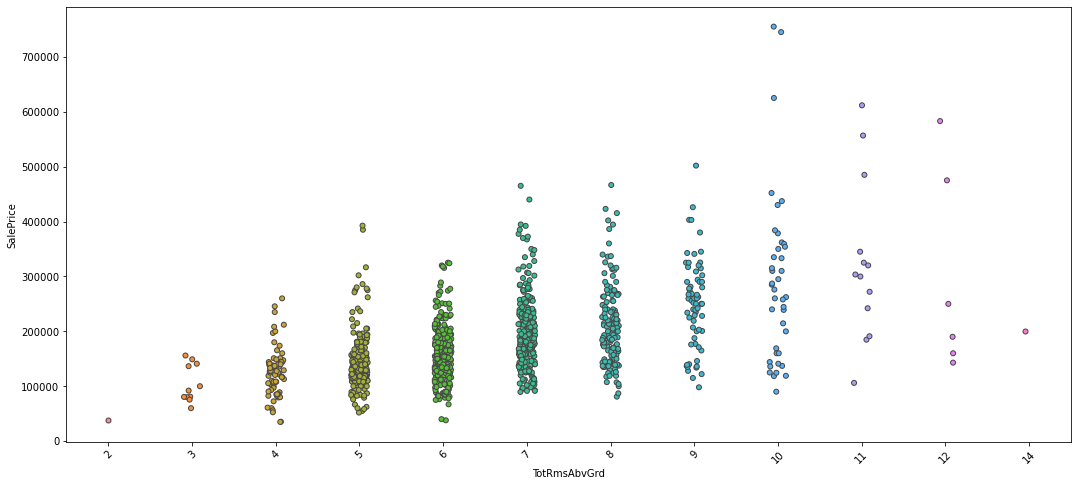

In [78]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=45)
sns.stripplot(train['TotRmsAbvGrd'],train['SalePrice'], linewidth=1)

Average ground area are categorical features.

## Fireplaces

In [79]:
train['Fireplaces'].unique()

array([1, 0, 2, 3], dtype=int64)

In [80]:
train['Fireplaces'].value_counts()

0    551
1    518
2     94
3      5
Name: Fireplaces, dtype: int64

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

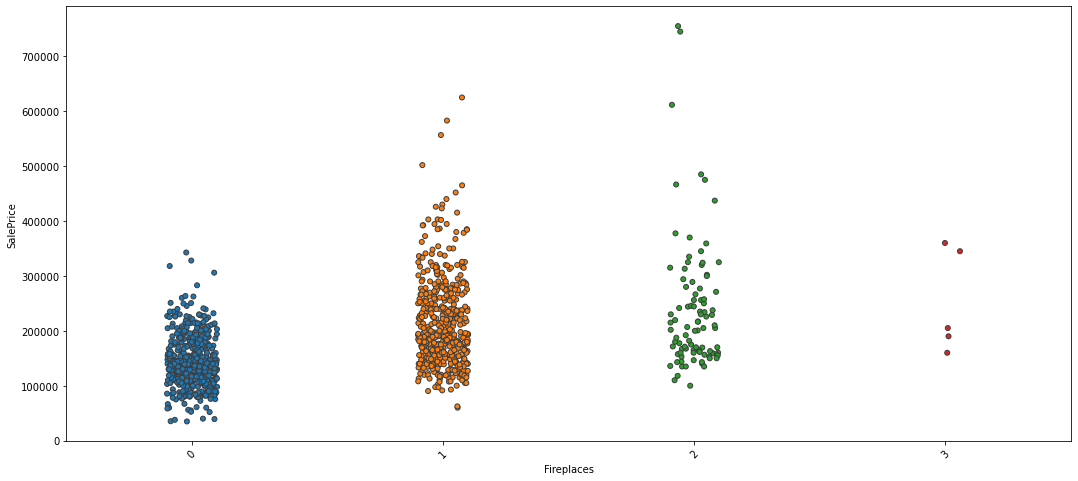

In [81]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=45)
sns.stripplot(train['Fireplaces'],train['SalePrice'], linewidth=1)

Houses with 1 or 2 fireplaces have more sale price.

In [82]:
train['GarageCars'].unique()

array([2, 3, 1, 0, 4], dtype=int64)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

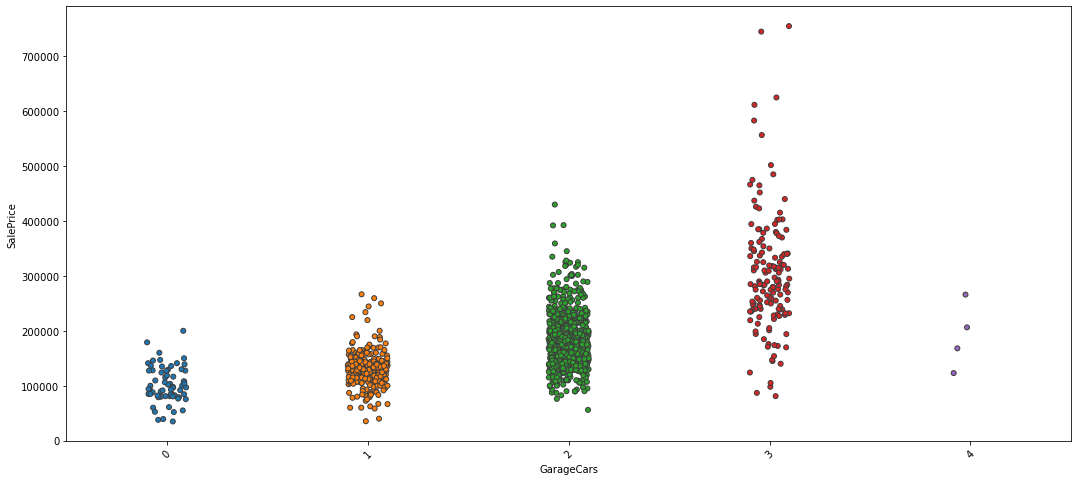

In [83]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=45)
sns.stripplot(train['GarageCars'],train['SalePrice'], linewidth=1)

More number of garage car parking space results in costlier house.

In [84]:
train['GarageArea'].describe()

count    1168.000000
mean      476.860445
std       214.466769
min         0.000000
25%       338.000000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

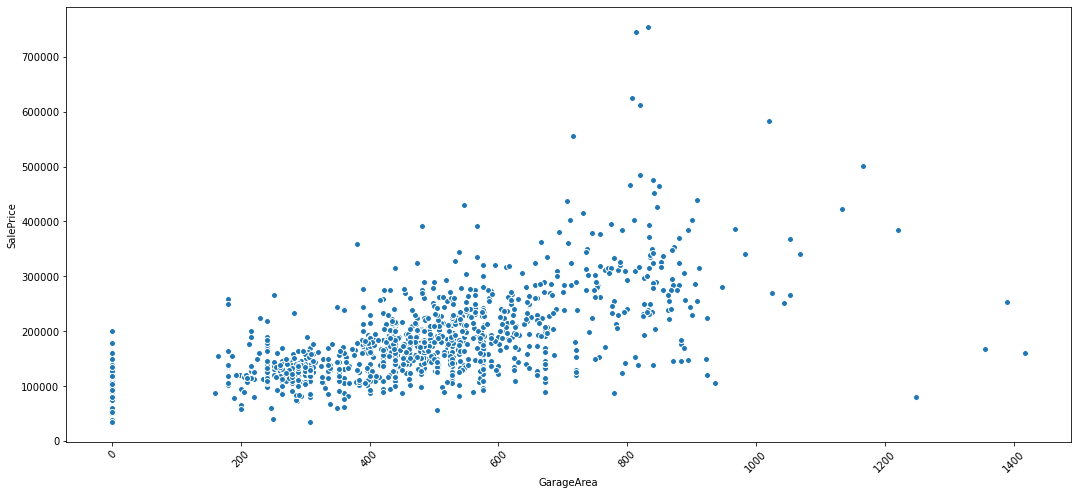

In [85]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=45)
sns.scatterplot(train['GarageArea'],train['SalePrice'], linewidth=1)

Same with garage area.

## WoodDeckSF

In [86]:
train['WoodDeckSF'].describe()

count    1168.000000
mean       96.206336
std       126.158988
min         0.000000
25%         0.000000
50%         0.000000
75%       171.000000
max       857.000000
Name: WoodDeckSF, dtype: float64

<AxesSubplot:xlabel='WoodDeckSF', ylabel='SalePrice'>

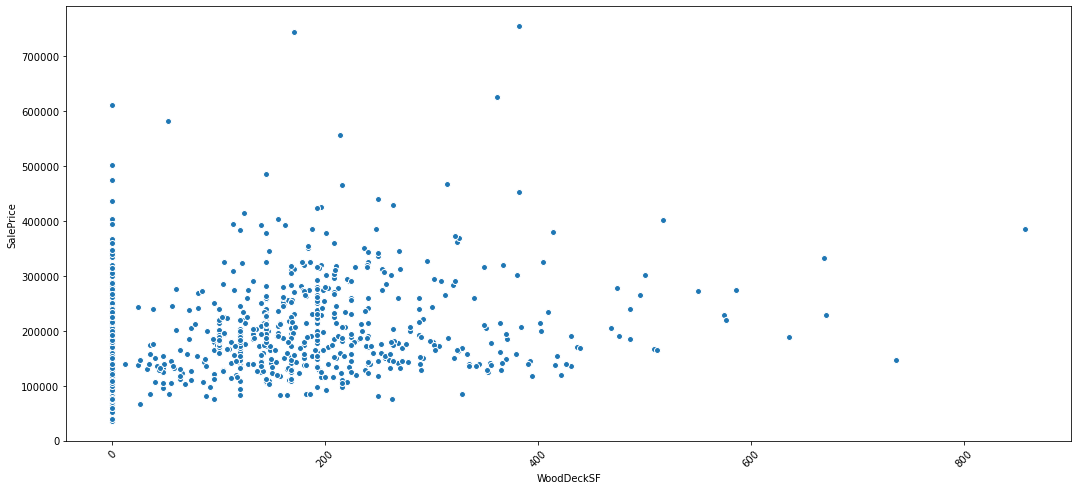

In [87]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=45)
sns.scatterplot(train['WoodDeckSF'],train['SalePrice'], linewidth=1)

<AxesSubplot:xlabel='WoodDeckSF'>

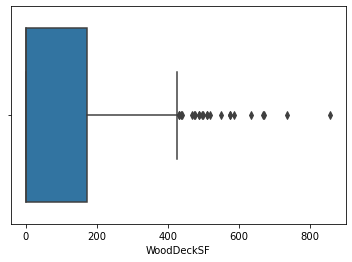

In [88]:
sns.boxplot(train['WoodDeckSF'])

In [89]:
train['OpenPorchSF'].describe()

count    1168.000000
mean       46.559932
std        66.381023
min         0.000000
25%         0.000000
50%        24.000000
75%        70.000000
max       547.000000
Name: OpenPorchSF, dtype: float64

<AxesSubplot:xlabel='OpenPorchSF', ylabel='SalePrice'>

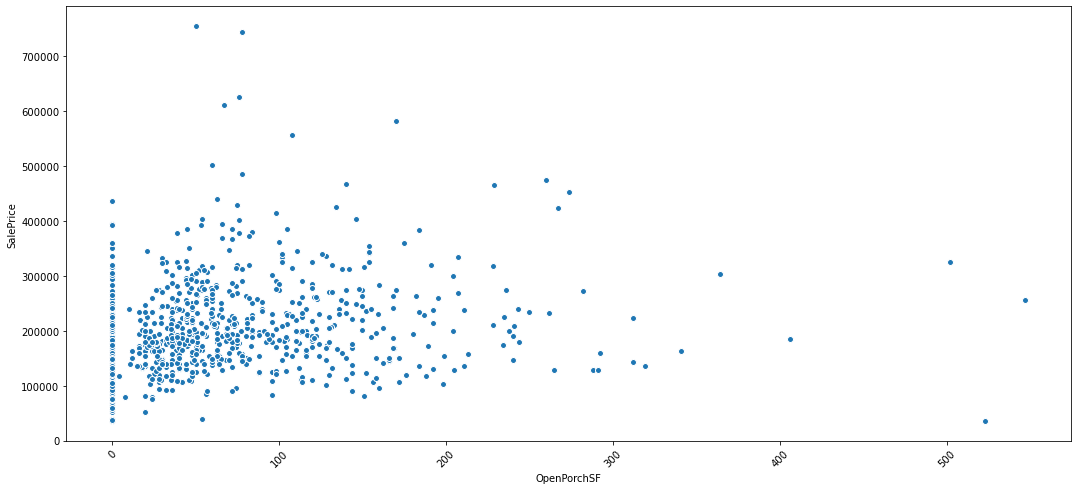

In [90]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=45)
sns.scatterplot(train['OpenPorchSF'],train['SalePrice'], linewidth=1)

<AxesSubplot:xlabel='OpenPorchSF'>

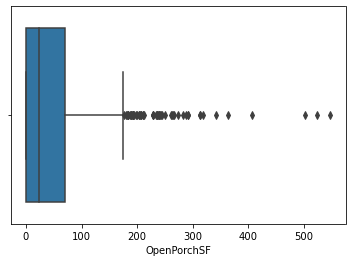

In [91]:
sns.boxplot(train['OpenPorchSF'])

In [92]:
train['EnclosedPorch'].unique()

array([  0, 184, 102, 112,  96, 192, 116, 126, 145,  39, 156, 200, 120,
       286, 244,  68,  80, 216, 137, 234, 272,  44, 105,  24,  70, 114,
        98, 280, 100,  42, 148, 202, 294, 108, 130, 176, 154, 259,  67,
        84, 252, 208, 293, 291, 228, 129, 138, 158, 144, 185, 136, 242,
        40, 224, 264, 128, 177,  56,  34, 189, 268,  99, 150, 205, 301,
       275, 196, 164, 168, 180, 194, 230,  81, 212, 239,  64, 134, 162,
       115, 218,  36, 254,  60,  77, 248, 236, 240, 210,  52, 169, 221,
       220, 318,  30, 160, 123,  90, 170,  50, 386, 190, 552,  91, 174,
        54, 172], dtype=int64)

In [93]:
train['EnclosedPorch'].value_counts()

0      999
112     13
96       6
192      5
216      5
      ... 
196      1
200      1
205      1
208      1
160      1
Name: EnclosedPorch, Length: 106, dtype: int64

<AxesSubplot:xlabel='EnclosedPorch', ylabel='SalePrice'>

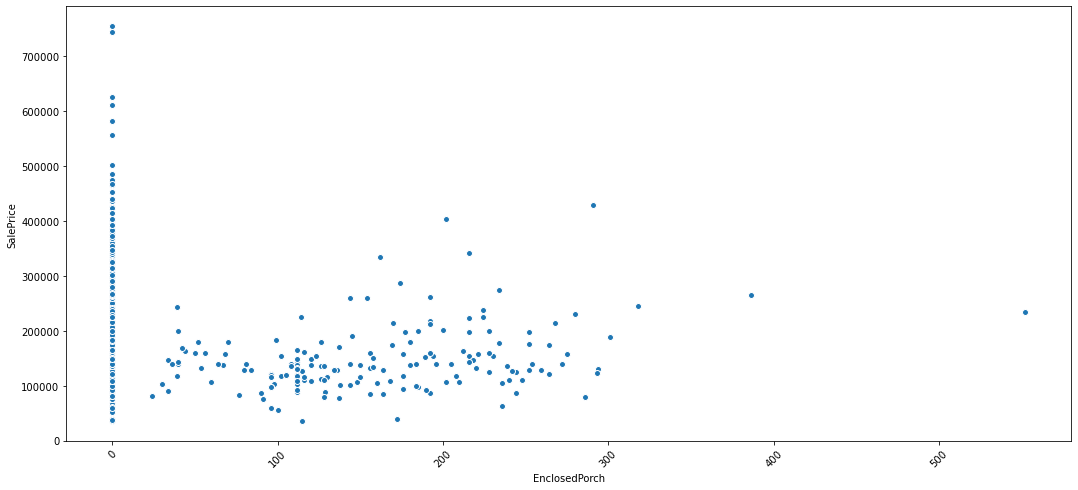

In [94]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=45)
sns.scatterplot(train['EnclosedPorch'],train['SalePrice'], linewidth=1)

As the houses with 0 EnclosedPorch and with some enclosed porch are present in the data set we will convert this column into two category feature.

In [95]:
train['EnclosedPorch_trans'] = train['EnclosedPorch'].apply(counted)

test['EnclosedPorch_trans'] = test['EnclosedPorch'].apply(counted)

train.drop('EnclosedPorch', axis='columns', inplace=True)
test.drop('EnclosedPorch', axis='columns', inplace=True)

In [96]:
train['3SsnPorch'].value_counts()

0      1146
168       3
216       2
180       2
144       2
290       1
245       1
238       1
196       1
182       1
304       1
162       1
153       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64

In [97]:
test['3SsnPorch'].value_counts()

0      290
407      1
320      1
Name: 3SsnPorch, dtype: int64

In [98]:
train['3SsnPorch_trans'] = train['3SsnPorch'].apply(counted)

test['3SsnPorch_trans'] = test['3SsnPorch'].apply(counted)

In [99]:
train.drop('3SsnPorch', axis='columns', inplace=True)
test.drop('3SsnPorch', axis='columns', inplace=True)

We converted the feature 3SsnPorch into only 2 categories and dropped the features as well.

In [100]:
train['ScreenPorch'].unique()

array([  0, 224,  95, 265,  53, 192, 480, 128, 189, 140, 160, 410, 204,
       155, 216, 182, 126, 116, 168, 178,  90, 185, 147, 184, 153, 266,
       222, 271, 273,  99, 176, 288,  60, 122, 180,  80, 225, 120, 144,
        63, 156, 165, 440, 175, 161, 145, 143, 252, 190, 142,  40, 100,
       200, 260, 259, 154, 322, 291, 287, 197, 163, 385, 170, 198, 130],
      dtype=int64)

In [101]:
train['ScreenPorch'].value_counts()

0      1073
192       5
224       5
189       4
126       3
       ... 
178       1
440       1
170       1
165       1
175       1
Name: ScreenPorch, Length: 65, dtype: int64

In [102]:
test['ScreenPorch'].value_counts()

0      271
120      2
192      1
90       1
119      1
144      1
147      1
152      1
170      1
180      1
396      1
374      1
210      1
220      1
233      1
234      1
259      1
263      1
276      1
312      1
198      1
Name: ScreenPorch, dtype: int64

<AxesSubplot:xlabel='ScreenPorch', ylabel='SalePrice'>

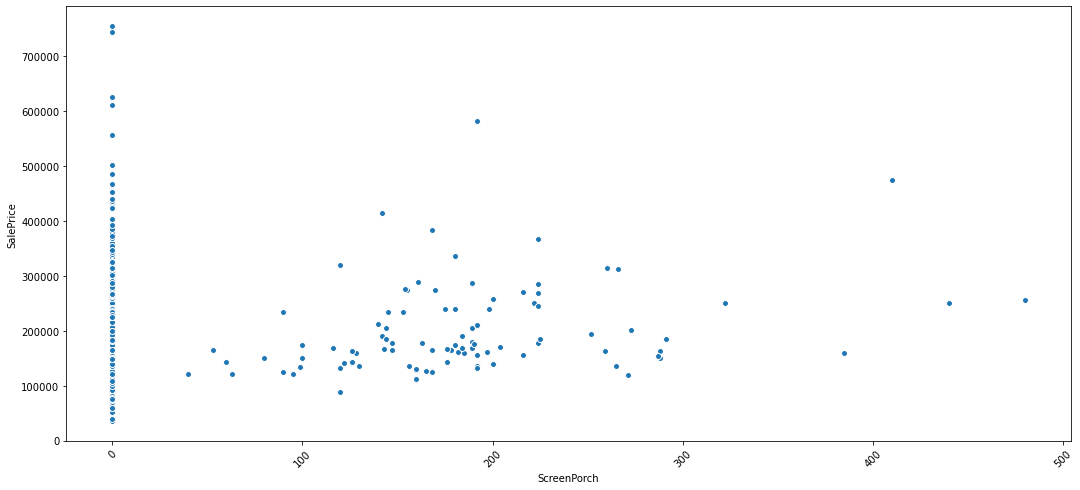

In [103]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=45)
sns.scatterplot(train['ScreenPorch'],train['SalePrice'], linewidth=1)

In [104]:
train['ScreenPorch_trans'] = train['ScreenPorch'].apply(counted)

test['ScreenPorch_trans'] = test['ScreenPorch'].apply(counted)

train.drop('ScreenPorch', axis='columns', inplace=True)
test.drop('ScreenPorch', axis='columns', inplace=True)

We followed the same process with ScreenPorch

In [105]:
train['PoolArea'].unique()

array([  0, 555, 576, 738, 519, 480, 648, 512], dtype=int64)

In [106]:
train['PoolArea'].value_counts()

0      1161
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [107]:
test['PoolArea'].value_counts()

0    292
Name: PoolArea, dtype: int64

In [108]:
train['PoolArea_trans'] = train['PoolArea'].apply(counted)

test['PoolArea_trans'] = test['PoolArea'].apply(counted)

train.drop('PoolArea', axis='columns', inplace=True)
test.drop('PoolArea', axis='columns', inplace=True)

We followed the same process with PoolArea

In [109]:
train['MiscVal'].unique()

array([    0,   400,  8300,   600,  1150,   500,  1200,   480,  1300,
        1400,  2000,   700,   620, 15500,   450,   800,    54,   350,
         560,  2500], dtype=int64)

In [110]:
train['MiscVal'].value_counts()

0        1126
400        10
500         7
2000        4
700         3
600         3
1200        2
15500       1
1150        1
800         1
620         1
1400        1
480         1
2500        1
450         1
1300        1
350         1
8300        1
54          1
560         1
Name: MiscVal, dtype: int64

In [111]:
test['MiscVal'].value_counts()

0       282
450       3
700       2
500       1
480       1
3500      1
400       1
600       1
Name: MiscVal, dtype: int64

In [112]:
train['MiscVal_trans'] = train['MiscVal'].apply(counted)

test['MiscVal_trans'] = test['MiscVal'].apply(counted)

train.drop('MiscVal', axis='columns', inplace=True)
test.drop('MiscVal', axis='columns', inplace=True)

We followed the same process with MiscVal.

In [113]:
train['MoSold'].unique()

array([ 2, 10,  6,  1, 11,  5,  4,  7,  8,  3,  9, 12], dtype=int64)

In [114]:
train['MoSold'].value_counts()

6     203
7     187
5     166
4     113
8      95
3      87
11     67
10     66
9      57
12     46
1      44
2      37
Name: MoSold, dtype: int64

<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

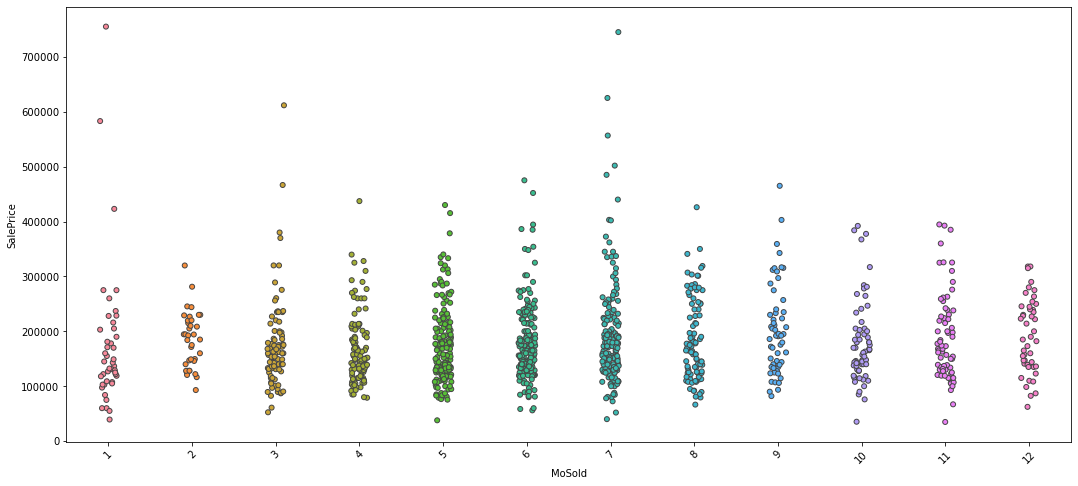

In [115]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=45)
sns.stripplot(train['MoSold'],train['SalePrice'], linewidth=1)

MoSold with 7 has highest saleprice.

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

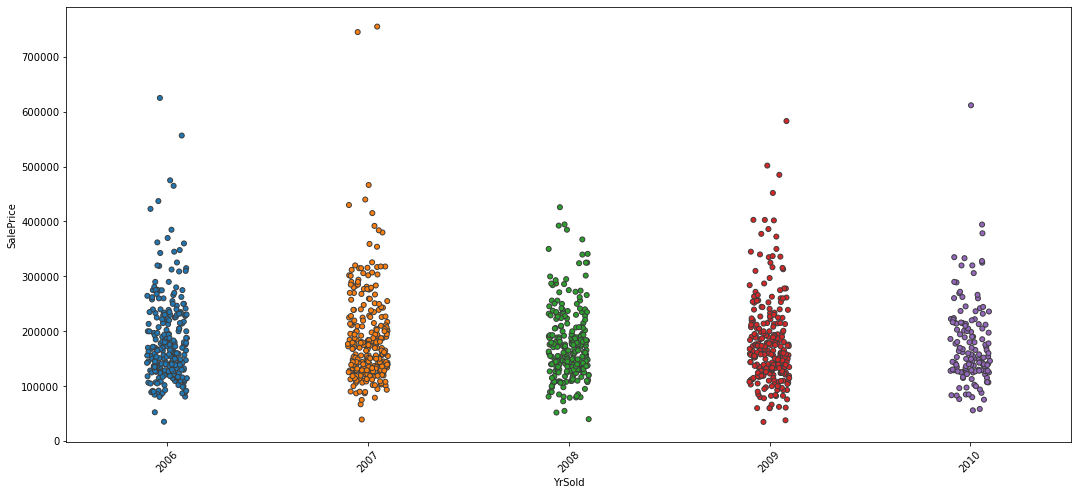

In [116]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=45)
sns.stripplot(train['YrSold'],train['SalePrice'], linewidth=1)

In [117]:
train['YrSold'].value_counts()

2007    264
2009    260
2006    254
2008    248
2010    142
Name: YrSold, dtype: int64

In [118]:
test['YrSold'].value_counts()

2009    78
2007    65
2006    60
2008    56
2010    33
Name: YrSold, dtype: int64

In [119]:
train['LotFrontage'].describe()

count    954.00000
mean      70.98847
std       24.82875
min       21.00000
25%       60.00000
50%       70.00000
75%       80.00000
max      313.00000
Name: LotFrontage, dtype: float64

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

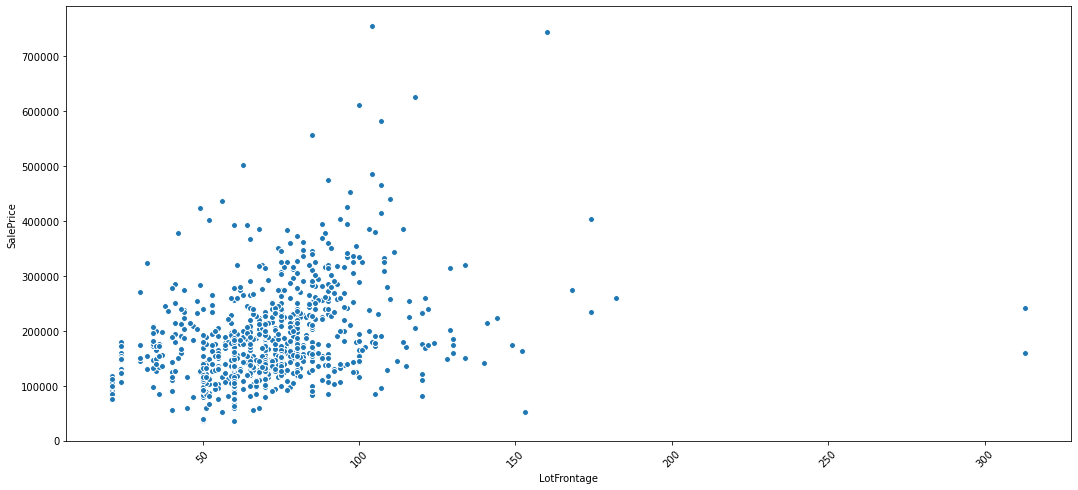

In [120]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=45)
sns.scatterplot(train['LotFrontage'],train['SalePrice'], linewidth=1)

<AxesSubplot:xlabel='LotFrontage'>

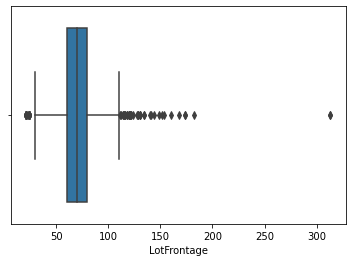

In [121]:
sns.boxplot(train['LotFrontage'])

In [122]:
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())

In [123]:
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mean())

We have treated missing values for the feature LotFrontage.

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

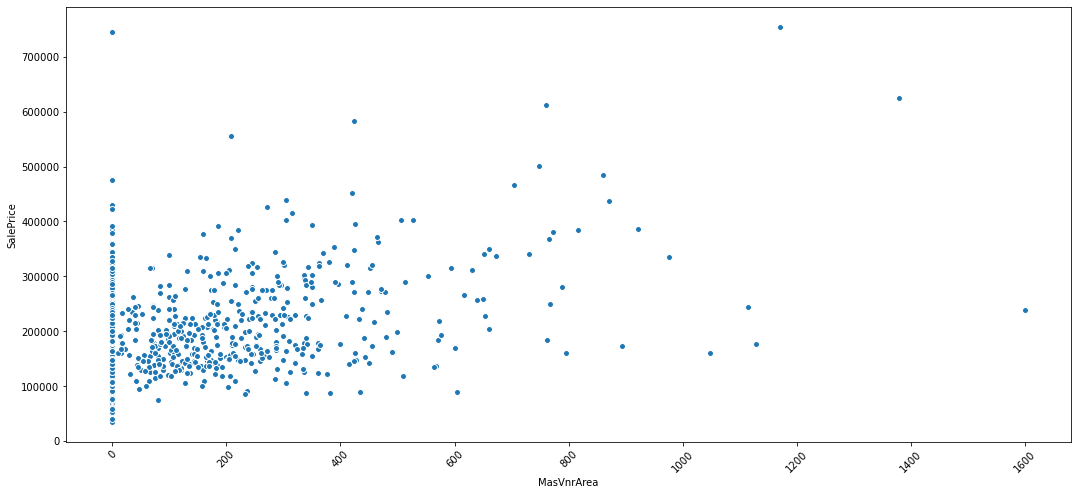

In [124]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=45)
sns.scatterplot(train['MasVnrArea'],train['SalePrice'], linewidth=1)

<AxesSubplot:xlabel='MasVnrArea'>

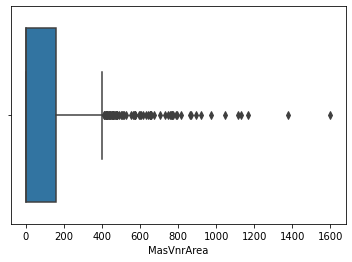

In [125]:
sns.boxplot(train['MasVnrArea'])

In [126]:
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mean())

In [127]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

We have treated the missing values in MasVnrArea

<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

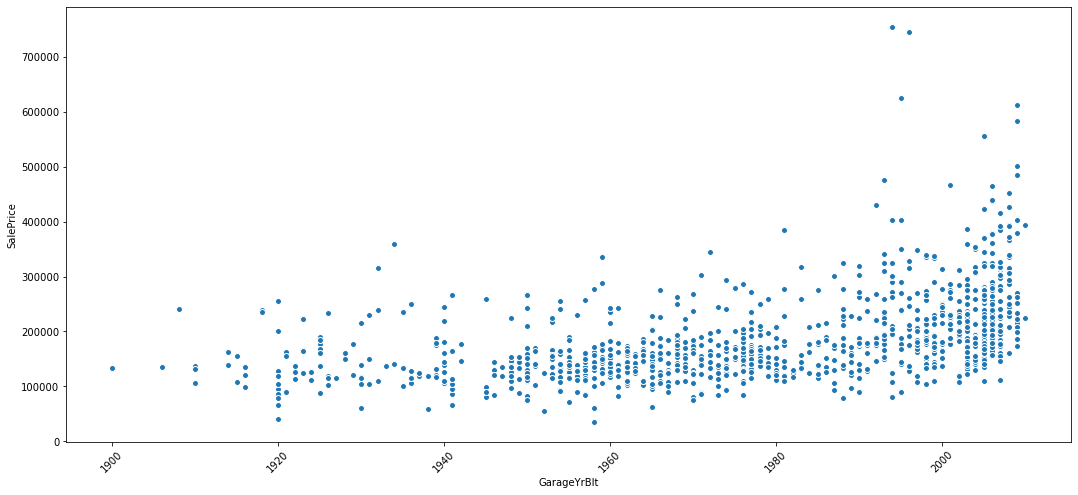

In [128]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=45)
sns.scatterplot(train['GarageYrBlt'],train['SalePrice'], linewidth=1)

<AxesSubplot:xlabel='GarageYrBlt'>

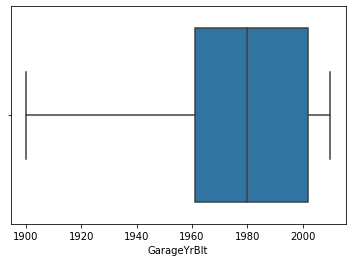

In [129]:
sns.boxplot(train['GarageYrBlt'])

In [130]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())

In [131]:
train['GarageYear'] = 2021 - train['GarageYrBlt']
test['GarageYear'] = 2021 - test['GarageYrBlt']

In [132]:
train.drop('GarageYrBlt', axis='columns',inplace=True)
test.drop('GarageYrBlt', axis='columns',inplace=True)

We have treated the missing values in GarageYrBlt

<AxesSubplot:xlabel='Condition1', ylabel='SalePrice'>

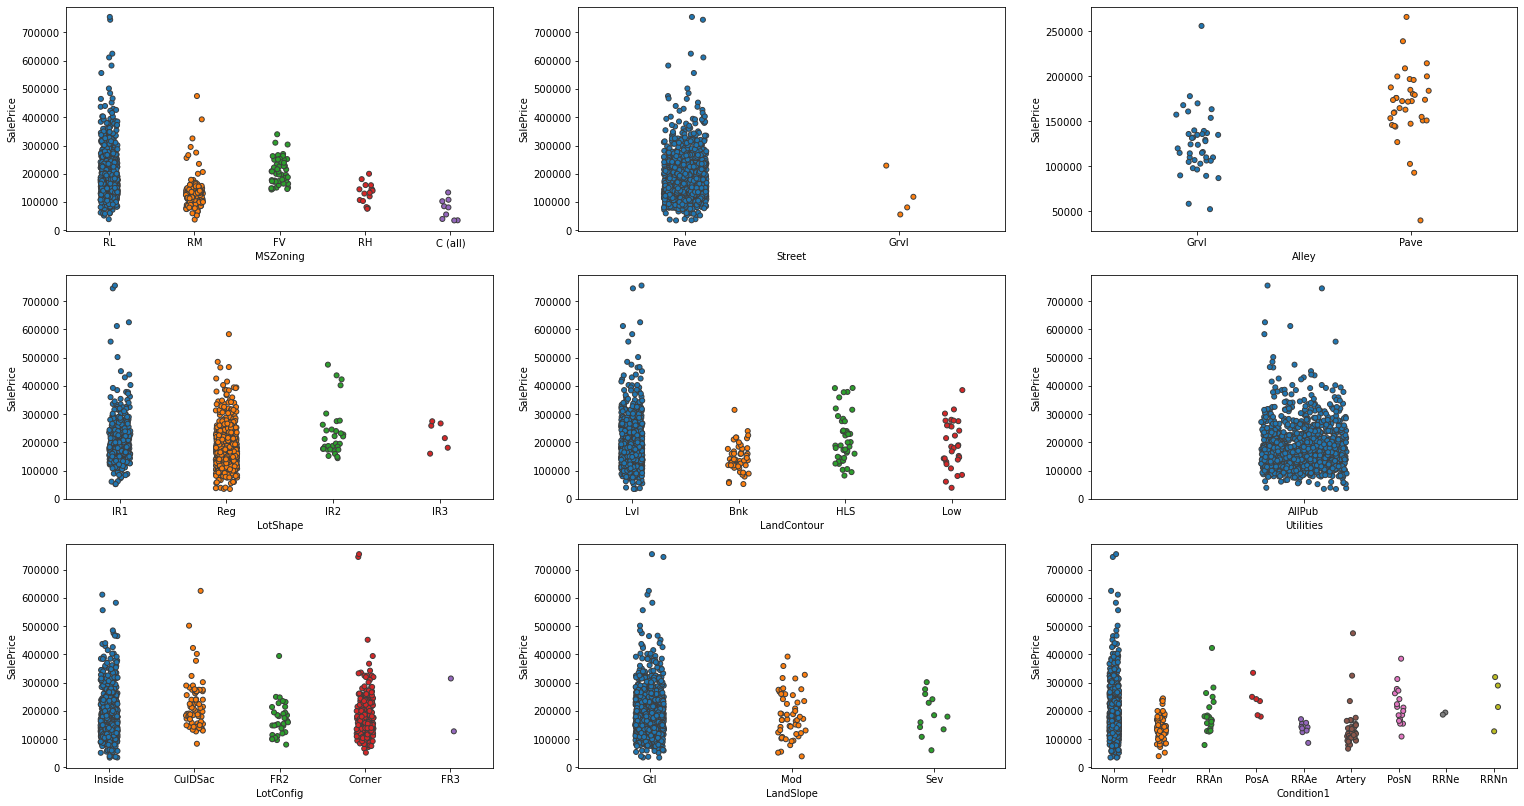

In [133]:
figure, axes = plt.subplots(3,3, figsize=(26,14))
sns.stripplot(ax=axes[0,0], data=train, x= 'MSZoning', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[0,1], data=train, x= 'Street', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[0,2], data=train, x= 'Alley', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[1,0], data=train, x= 'LotShape', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[1,1], data=train, x= 'LandContour', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[1,2], data=train, x= 'Utilities', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[2,0], data=train, x= 'LotConfig', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[2,1], data=train, x= 'LandSlope', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[2,2], data=train, x= 'Condition1', y= 'SalePrice', linewidth=1)

**Observations:**<br>
    1) MSZoning with RL houses are more costlier. We will treat this feature as ordinal feature.<br>
    2) Street has very negligible amount of two classes. We will drop this feature.<br>
    3) Looking at the plot feature "Alley" has huge number of null values. We cannot assume and treat these null values. We will also drop this column<br>
    4) LotShape with IR1 are costlier and most houses fall under Reg.<br>
    5) All the above feature follow sme trend and We will drop Utilities features as it has only 1 class.

In [134]:
train['Street'].value_counts()

Pave    1164
Grvl       4
Name: Street, dtype: int64

In [135]:
test['Street'].value_counts()

Pave    290
Grvl      2
Name: Street, dtype: int64

In [136]:
train['Alley'].value_counts()

Grvl    41
Pave    36
Name: Alley, dtype: int64

In [137]:
test['Alley'].value_counts()

Grvl    9
Pave    5
Name: Alley, dtype: int64

In [138]:
train['LotShape'].value_counts()

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64

In [139]:
train.drop('Street', axis='columns', inplace=True)
test.drop('Street', axis='columns', inplace=True)

train.drop('Alley', axis='columns', inplace=True)
test.drop('Alley', axis='columns', inplace=True)

train.drop('Utilities', axis='columns', inplace=True)
test.drop('Utilities', axis='columns', inplace=True)

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

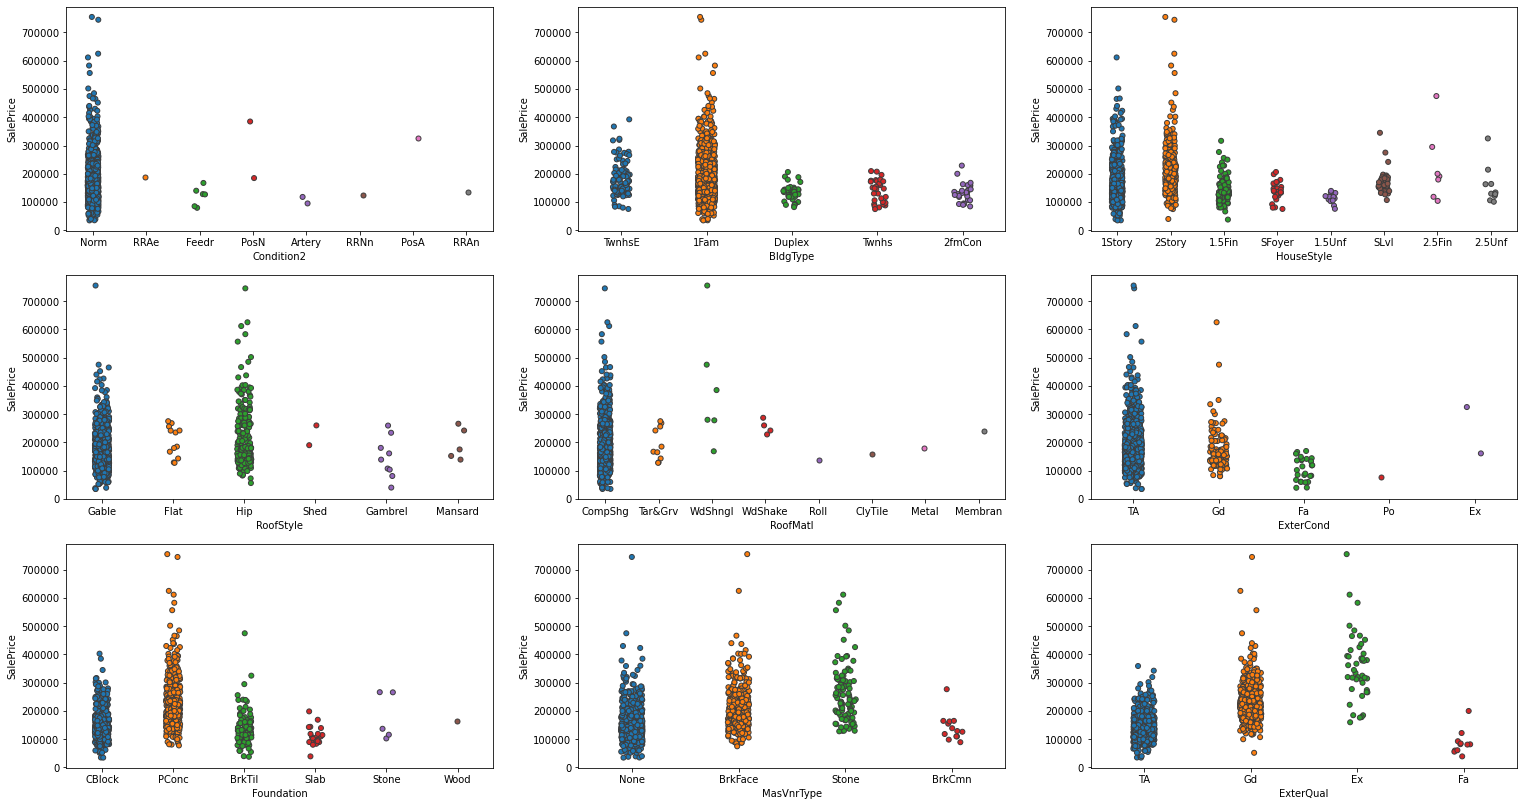

In [140]:
figure, axes = plt.subplots(3,3, figsize=(26,14))
sns.stripplot(ax=axes[0,0], data=train, x= 'Condition2', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[0,1], data=train, x= 'BldgType', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[0,2], data=train, x= 'HouseStyle', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[1,0], data=train, x= 'RoofStyle', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[1,1], data=train, x= 'RoofMatl', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[1,2], data=train, x= 'ExterCond', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[2,0], data=train, x= 'Foundation', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[2,1], data=train, x= 'MasVnrType', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[2,2], data=train, x= 'ExterQual', y= 'SalePrice', linewidth=1)

**Observations:**<br>
1) Condition2 feature seems to have one class highly populated and the other class has very few entries. We will decide to drope this feature.<br>
2) Same goes with feature RoofMatl. We will drop this feature as well.<br>
3) we wil encode all the other features assuming these are ordinal features.

In [141]:
test['Condition2'].value_counts()

Norm    291
RRNn      1
Name: Condition2, dtype: int64

In [142]:
train['Condition2'].value_counts()

Norm      1154
Feedr        6
PosN         2
Artery       2
RRAn         1
RRAe         1
RRNn         1
PosA         1
Name: Condition2, dtype: int64

In [143]:
train['RoofMatl'].value_counts()

CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
Metal         1
Roll          1
ClyTile       1
Membran       1
Name: RoofMatl, dtype: int64

In [144]:
test['RoofMatl'].value_counts()

CompShg    290
WdShake      1
Tar&Grv      1
Name: RoofMatl, dtype: int64

In [145]:
train.drop('Condition2', axis='columns', inplace=True)
test.drop('Condition2', axis='columns', inplace=True)

train.drop('RoofMatl', axis='columns', inplace=True)
test.drop('RoofMatl', axis='columns', inplace=True)

<AxesSubplot:xlabel='Electrical', ylabel='SalePrice'>

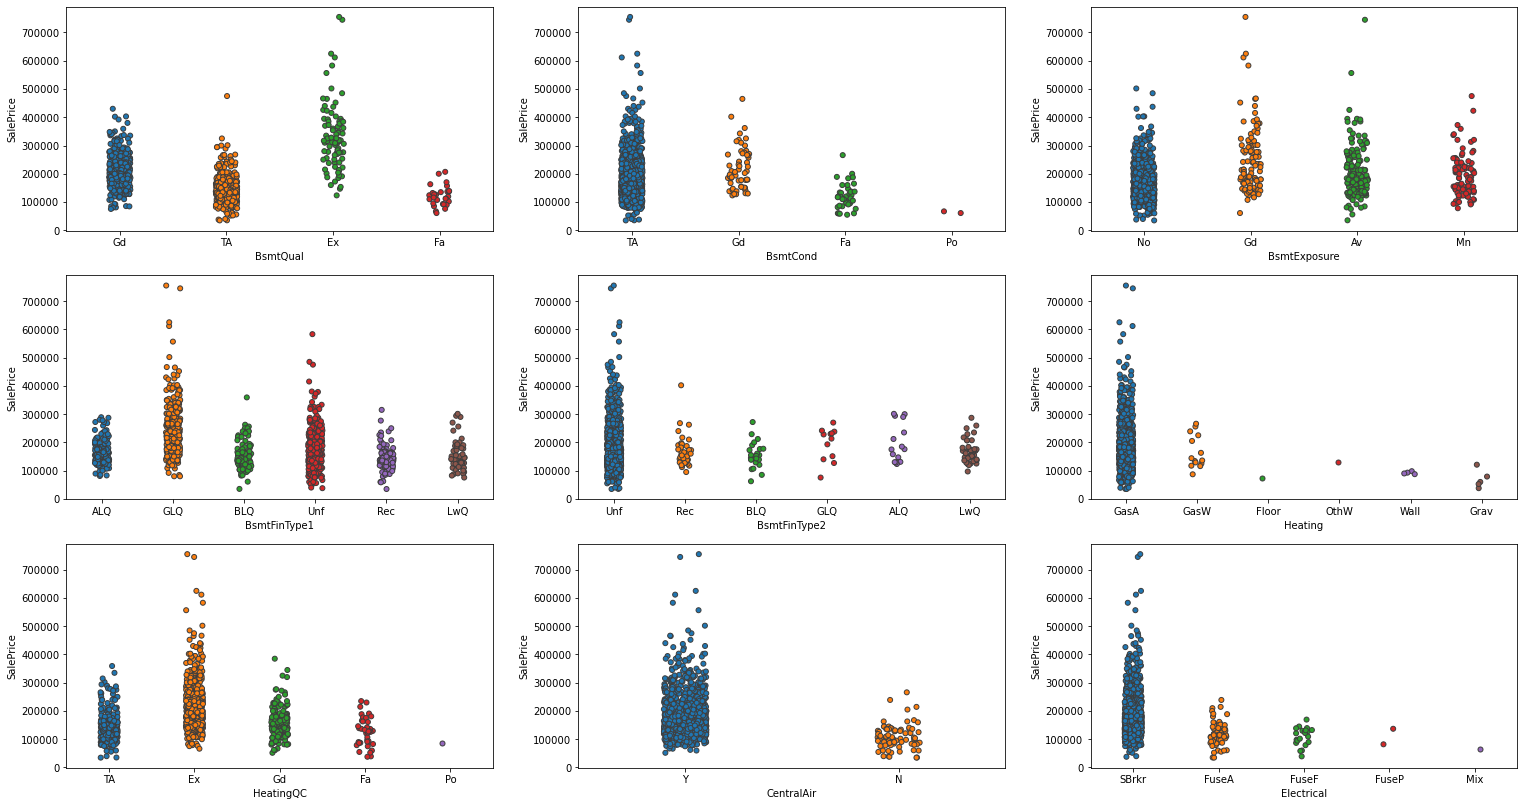

In [146]:
figure, axes = plt.subplots(3,3, figsize=(26,14))
sns.stripplot(ax=axes[0,0], data=train, x= 'BsmtQual', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[0,1], data=train, x= 'BsmtCond', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[0,2], data=train, x= 'BsmtExposure', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[1,0], data=train, x= 'BsmtFinType1', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[1,1], data=train, x= 'BsmtFinType2', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[1,2], data=train, x= 'Heating', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[2,0], data=train, x= 'HeatingQC', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[2,1], data=train, x= 'CentralAir', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[2,2], data=train, x= 'Electrical', y= 'SalePrice', linewidth=1)

**Observations:**
1) In feature Heating most feature are classified as GasA. This will not be usefull so we will drop this feature.<br>
2) features BsmtCond, BsmtExposure, BsmtFinType1 ,BsmtFinType2 have missing values. We will treat them by filling missing values by most frequent class.<br>

In [147]:
train['Heating'].value_counts()

GasA     1143
GasW       14
Grav        5
Wall        4
OthW        1
Floor       1
Name: Heating, dtype: int64

In [148]:
test['Heating'].value_counts()

GasA    285
GasW      4
Grav      2
OthW      1
Name: Heating, dtype: int64

In [149]:
train['BsmtCond'] = train['BsmtCond'].fillna(train['BsmtCond'].mode())
train['BsmtExposure'] = train['BsmtExposure'].fillna(train['BsmtExposure'].mode())
train['BsmtFinType1'] = train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode())
train['BsmtFinType2'] = train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode())

In [150]:
test['BsmtCond'] = test['BsmtCond'].fillna(test['BsmtCond'].mode())
test['BsmtExposure'] = test['BsmtExposure'].fillna(test['BsmtExposure'].mode())
test['BsmtFinType1'] = test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode())
test['BsmtFinType2'] = test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode())

We treated missing values in these 4 columns.

<AxesSubplot:xlabel='PoolQC', ylabel='SalePrice'>

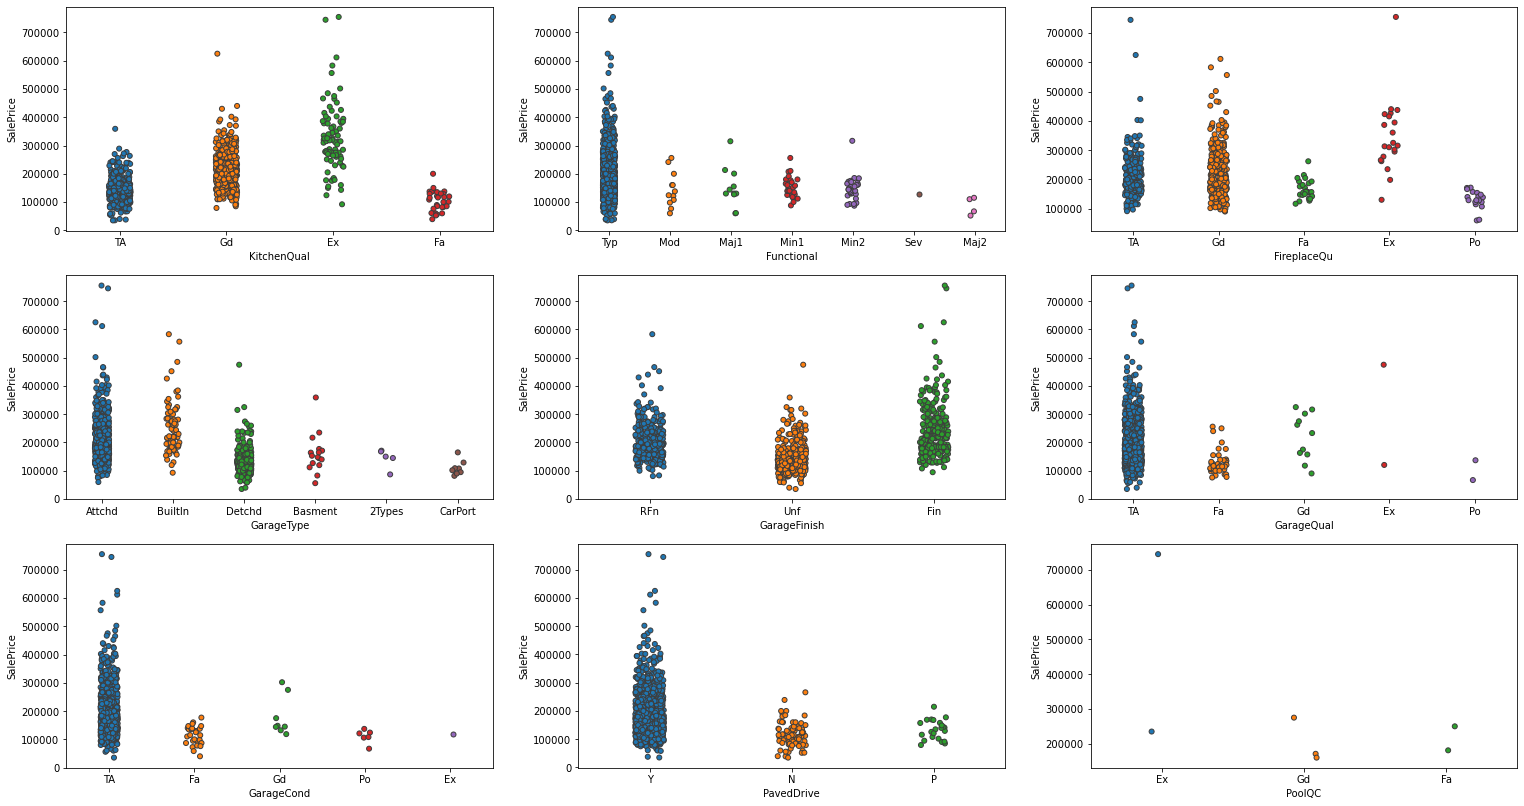

In [151]:
figure, axes = plt.subplots(3,3, figsize=(26,14))
sns.stripplot(ax=axes[0,0], data=train, x= 'KitchenQual', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[0,1], data=train, x= 'Functional', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[0,2], data=train, x= 'FireplaceQu', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[1,0], data=train, x= 'GarageType', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[1,1], data=train, x= 'GarageFinish', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[1,2], data=train, x= 'GarageQual', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[2,0], data=train, x= 'GarageCond', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[2,1], data=train, x= 'PavedDrive', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[2,2], data=train, x= 'PoolQC', y= 'SalePrice', linewidth=1)

**Observations:**
1) Clearly we will delete or remove PoolQC feature.<br>
2) We will treat missing values in FireplaceQu, GarageType,GarageFinish, GarageQual and GarageCond.<br>

In [152]:
train.drop('PoolQC', axis='columns', inplace=True)
test.drop('PoolQC', axis='columns', inplace=True)

In [153]:
train['FireplaceQu'] = train['FireplaceQu'].fillna(train['FireplaceQu'].mode())
train['GarageType'] = train['GarageType'].fillna(train['GarageType'].mode())
train['GarageFinish'] = train['GarageFinish'].fillna(train['GarageFinish'].mode())
train['GarageQual'] = train['GarageQual'].fillna(train['GarageQual'].mode())
train['GarageCond'] = train['GarageCond'].fillna(train['GarageCond'].mode())

In [154]:
test['FireplaceQu'] = test['FireplaceQu'].fillna(test['FireplaceQu'].mode())
test['GarageType'] = test['GarageType'].fillna(test['GarageType'].mode())
test['GarageFinish'] = test['GarageFinish'].fillna(test['GarageFinish'].mode())
test['GarageQual'] = test['GarageQual'].fillna(test['GarageQual'].mode())
test['GarageCond'] = test['GarageCond'].fillna(test['GarageCond'].mode())

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

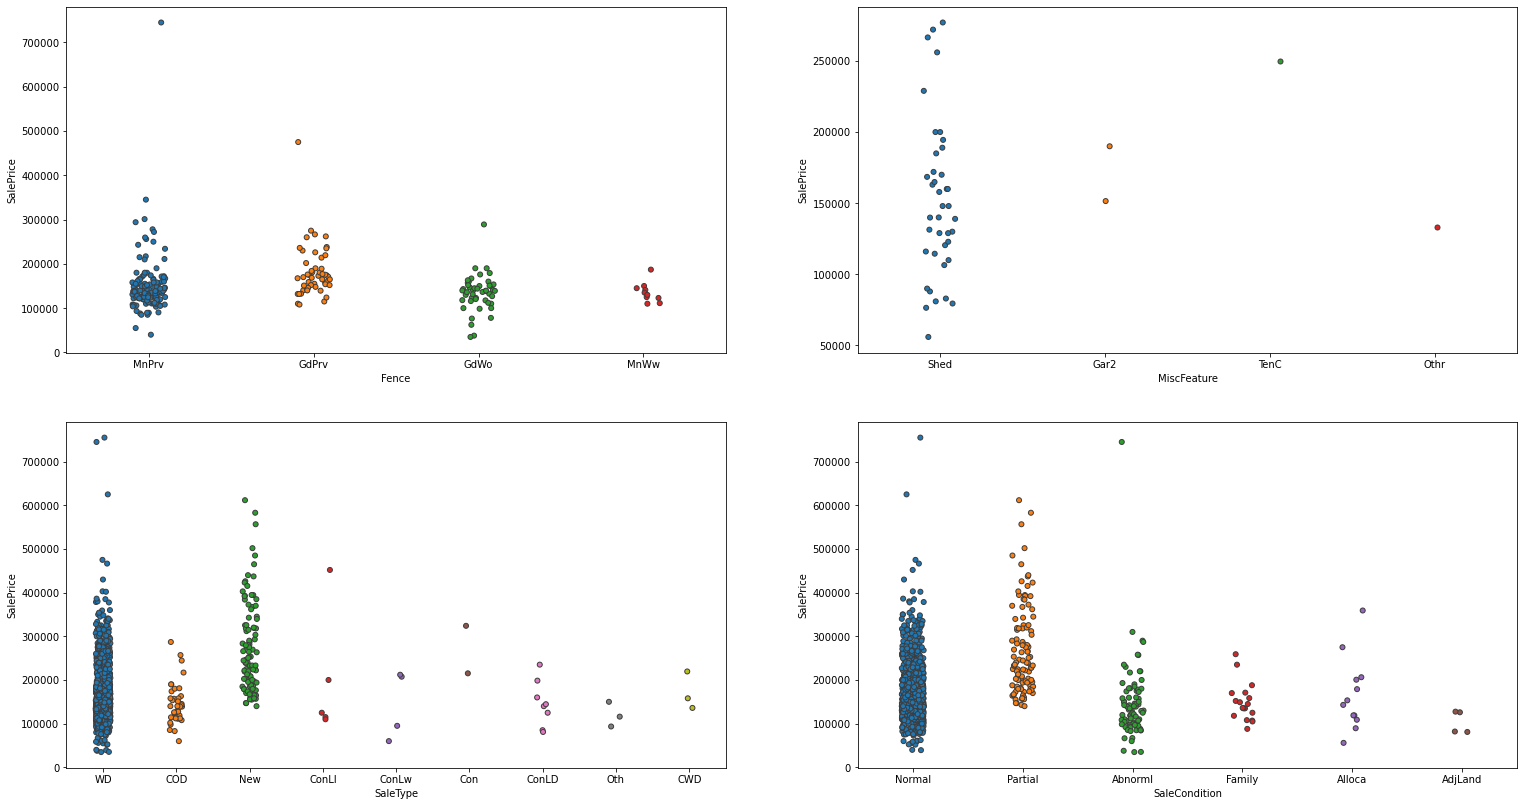

In [155]:
figure, axes = plt.subplots(2,2, figsize=(26,14))
sns.stripplot(ax=axes[0,0], data=train, x= 'Fence', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[0,1], data=train, x= 'MiscFeature', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[1,0], data=train, x= 'SaleType', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[1,1], data=train, x= 'SaleCondition', y= 'SalePrice', linewidth=1)

**Observations:**<br>
1) We will drop MiscFeature as it doesn't have much entries.<br>
2) same goes with Fence.<br>

In [156]:
train.drop('Fence', axis='columns', inplace=True)
test.drop('Fence', axis='columns', inplace=True)

train.drop('MiscFeature', axis='columns', inplace=True)
test.drop('MiscFeature', axis='columns', inplace=True)

In [157]:
train['SaleType'].value_counts()

WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
CWD        3
Oth        3
Con        2
Name: SaleType, dtype: int64

In [158]:
test['SaleType'].value_counts()

WD       268
New       16
COD        5
ConLw      1
CWD        1
ConLD      1
Name: SaleType, dtype: int64

In [159]:
def divide(string):
    if string == 'WD':
        return 2
    elif string == 'New':
        return 1
    else:
        return 0

In [160]:
train['SaleType_trans'] = train['SaleType'].apply(divide)
test['SaleType_trans'] = test['SaleType'].apply(divide)

train.drop('SaleType', axis='columns', inplace=True)
test.drop('SaleType', axis='columns', inplace=True)

We have dropped the sales type columns and added new column after converting the original column.

<AxesSubplot:xlabel='Exterior2nd', ylabel='SalePrice'>

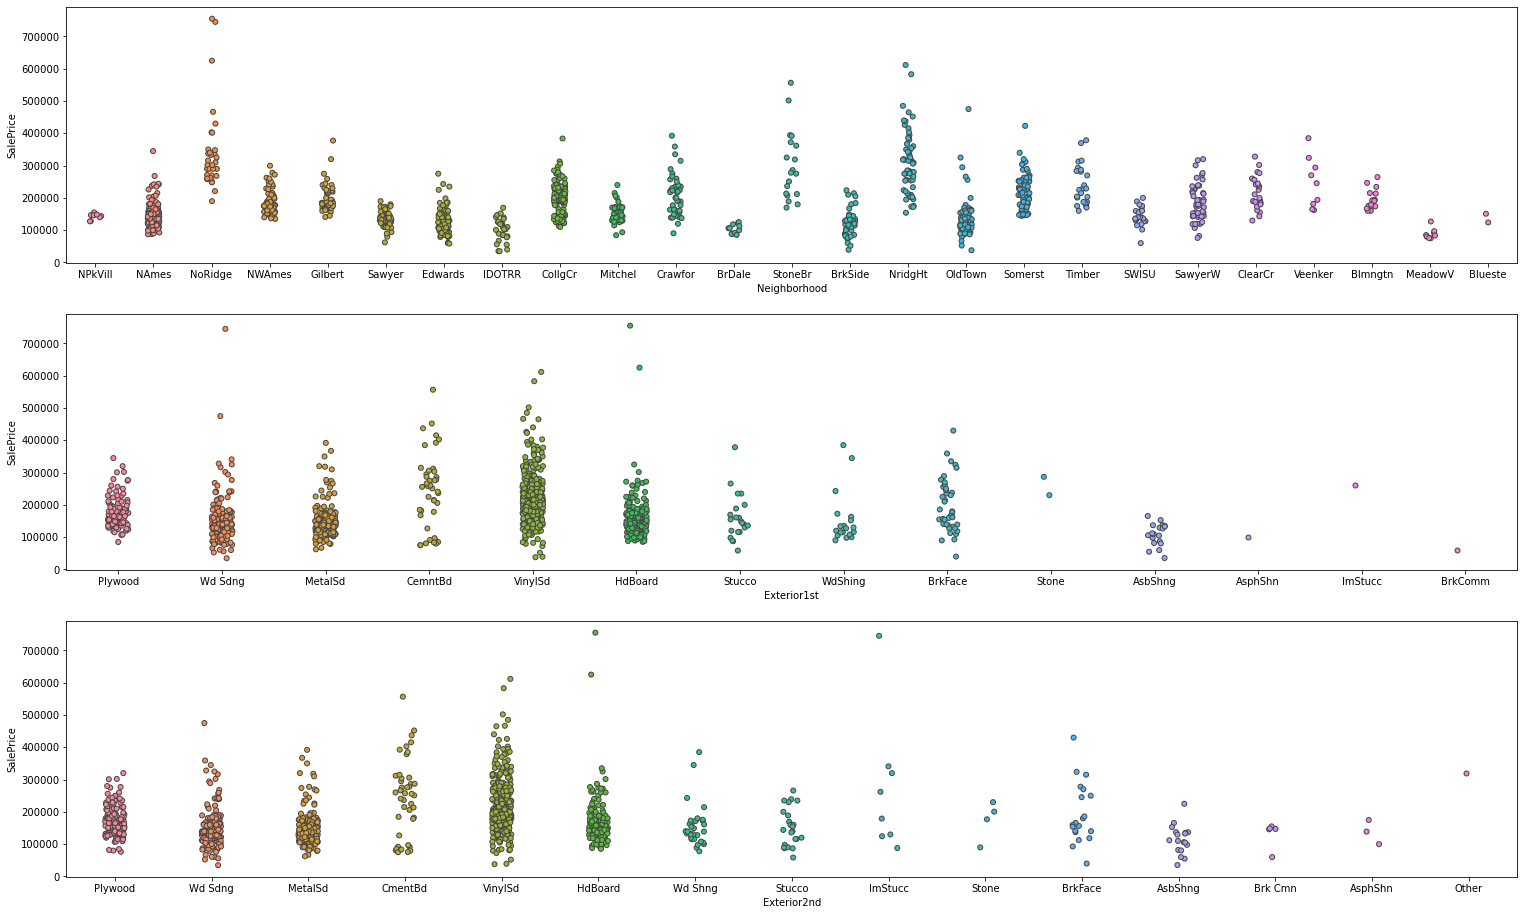

In [161]:
figure, axes = plt.subplots(3, figsize=(26,16))
sns.stripplot(ax=axes[0], data=train, x= 'Neighborhood', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[1], data=train, x= 'Exterior1st', y= 'SalePrice', linewidth=1)
sns.stripplot(ax=axes[2], data=train, x= 'Exterior2nd', y= 'SalePrice', linewidth=1)

There are multiple classes in these three columns.

In [162]:
print(train.select_dtypes(include=['object']).columns)

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleCondition'],
      dtype='object')


In [163]:
print(test.select_dtypes(include=['object']).columns)

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleCondition'],
      dtype='object')


In [164]:
object_list = list(train.select_dtypes(include=['object']).columns)

## Encoding

In [165]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [166]:
for column in object_list:
    train[column] = le.fit_transform(train[column])

In [167]:
for column in object_list:
    test[column] = le.fit_transform(test[column])

<AxesSubplot:>

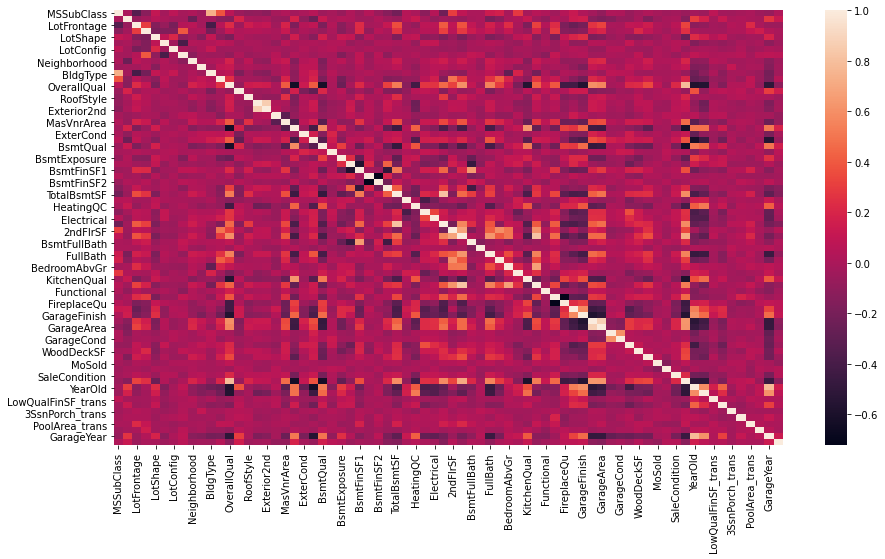

In [168]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr())

In [169]:
pd. set_option('display.max_rows', 100)

In [170]:
corr_relation = train.corr()
corr_relation['SalePrice'].sort_values(ascending=False)

SalePrice              1.000000
OverallQual            0.789185
GrLivArea              0.707300
GarageCars             0.628329
GarageArea             0.619000
TotalBsmtSF            0.595042
1stFlrSF               0.587642
FullBath               0.554988
TotRmsAbvGrd           0.528363
MasVnrArea             0.463626
Fireplaces             0.459611
Foundation             0.374169
BsmtFinSF1             0.362874
OpenPorchSF            0.339500
2ndFlrSF               0.330386
LotFrontage            0.323779
WoodDeckSF             0.315444
HalfBath               0.295592
LotArea                0.249499
CentralAir             0.246754
Electrical             0.234621
PavedDrive             0.231707
SaleCondition          0.217687
BsmtUnfSF              0.215724
BsmtFullBath           0.212924
HouseStyle             0.205502
Neighborhood           0.198942
RoofStyle              0.192654
BedroomAbvGr           0.158281
Functional             0.118673
ExterCond              0.115167
Exterior

Looking at the correlation, We see there are multiple columns which have very less correlated with our target feature. <br>
We will drop them as they do not help in model creation.

In [171]:
train.drop(['Exterior2nd','MoSold','ScreenPorch_trans','3SsnPorch_trans','LandContour','GarageCond','MasVnrType','LandSlope','BsmtCond','BsmtFinType2','BsmtFinSF2','GarageQual','BsmtHalfBath','YrSold','LowQualFinSF_trans','LotConfig','MSSubClass','MiscVal_trans','OverallCond','BldgType'], axis='columns', inplace=True)
test.drop(['Exterior2nd','MoSold','ScreenPorch_trans','3SsnPorch_trans','LandContour','GarageCond','MasVnrType','LandSlope','BsmtCond','BsmtFinType2','BsmtFinSF2','GarageQual','BsmtHalfBath','YrSold','LowQualFinSF_trans','LotConfig','MSSubClass','MiscVal_trans','OverallCond','BldgType'], axis='columns', inplace=True)

We will look at the columns which are mutually correlated with each other and drop them. This will improve accuracy and reduces dimentionality

In [172]:
def correlation(dataset,threshold):
    col_corr = set() # Set of all names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: #We are interested in absolute coeff value
                colname = corr_matrix.columns[i] #Getting the name of the column
                col_corr.add(colname)
    return col_corr
                

In [173]:
corr_features = correlation(train,0.8)

In [174]:
len(set(corr_features))

3

In [175]:
corr_features

{'1stFlrSF', 'GarageArea', 'TotRmsAbvGrd'}

In [176]:
train.drop(['1stFlrSF', 'GarageArea', 'TotRmsAbvGrd'], axis='columns', inplace=True)
test.drop(['1stFlrSF', 'GarageArea', 'TotRmsAbvGrd'], axis='columns', inplace=True)

We have now reduced so many columns from the data set. We will not use any other feature importance methods and stick with theses column and proceed further.

# OUTLIERS AND SKEWNESS

We will firstly use zscore and if this method helps us reducing the rows in our appreciable range, we will proceed. If not in appreciable range we will try different method.

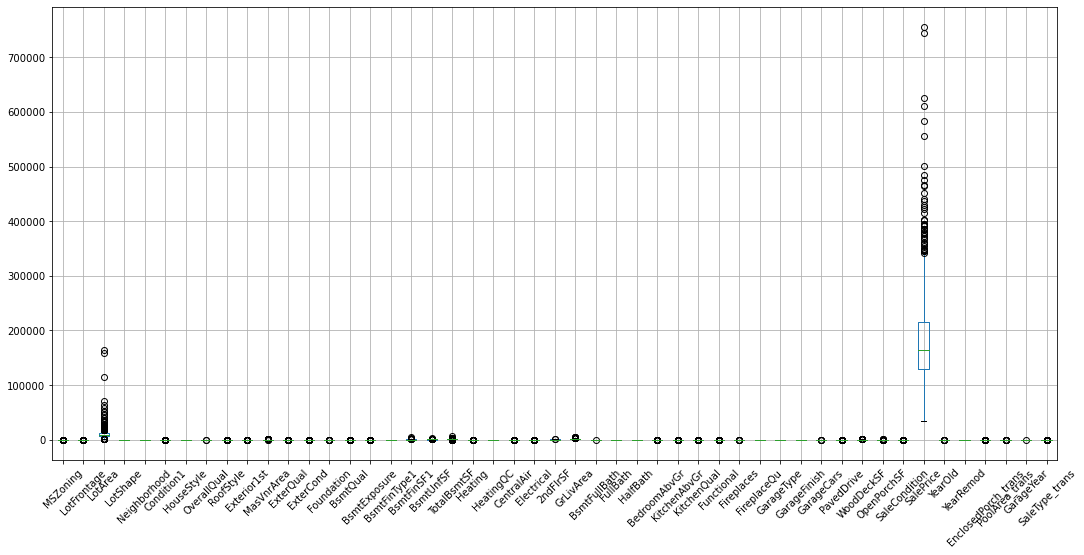

In [177]:
train.boxplot(figsize=(18,10))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=45)
plt.show()

In [178]:
from scipy.stats import zscore
z = np.abs(zscore(train))
z

array([[0.02164599, 0.        , 0.62061571, ..., 0.07764847, 0.04935633,
        0.38436734],
       [0.02164599, 1.07063136, 0.60090318, ..., 0.07764847, 0.33875365,
        0.38436734],
       [0.02164599, 0.93686671, 0.06307504, ..., 0.07764847, 0.77749319,
        0.38436734],
       ...,
       [0.02164599, 2.09513215, 0.91636244, ..., 0.07764847, 0.0906988 ,
        0.38436734],
       [4.76211672, 0.93583847, 0.22167034, ..., 0.07764847, 2.40587744,
        0.38436734],
       [0.02164599, 0.        , 0.29303823, ..., 0.07764847, 0.98420557,
        0.38436734]])

In [179]:
Thresold = 3
print(np.where(z>3))

(array([   3,    7,    9,    9,   10,   13,   22,   23,   23,   25,   25,
         26,   28,   29,   30,   32,   32,   32,   32,   39,   39,   40,
         42,   42,   43,   46,   48,   48,   48,   48,   49,   51,   51,
         52,   52,   54,   56,   58,   58,   68,   68,   72,   72,   72,
         76,   77,   77,   78,   78,   81,   85,   89,   89,   93,   96,
         97,   98,   98,   99,  103,  103,  103,  104,  105,  106,  113,
        119,  119,  119,  119,  122,  122,  123,  123,  123,  124,  127,
        128,  129,  130,  132,  140,  141,  141,  141,  141,  141,  141,
        141,  141,  142,  142,  143,  145,  151,  152,  153,  153,  158,
        159,  159,  160,  160,  163,  163,  168,  170,  174,  176,  177,
        177,  177,  177,  178,  180,  180,  184,  185,  186,  187,  191,
        192,  192,  192,  193,  195,  195,  196,  197,  197,  197,  197,
        204,  205,  205,  209,  210,  210,  210,  210,  211,  211,  211,
        212,  213,  213,  214,  217,  221,  224,  

In [180]:
data = train[(z<3).all(axis=1)]

In [181]:
data.shape

(668, 49)

In [182]:
train.shape

(1168, 49)

We are losing so much of data we will IQR method.

# Handling Outlier and Transformation

In [183]:
#function for detecting outliers when feature has skewness (by IQR)

def outlier_IQR(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75) - data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25) - (IQR*1.5)
    upper_bridge = data_frame[feature_name].quantile(0.75) + (IQR*1.5)
    return(lower_bridge,upper_bridge)

In [184]:
#function for detecting outliers when feature has huge skewness (by IQR)

def outlier_IQR3(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75) - data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25) - (IQR*3)
    upper_bridge = data_frame[feature_name].quantile(0.75) + (IQR*3)
    return(lower_bridge,upper_bridge)

In [185]:
#function for detecting outliers when feature has Normally Distributed (by mean-+3dtf)

def outlier_normally(data_frame,feature_name):
    lower_boundary = data_frame[feature_name].mean() - 3*data_frame[feature_name].std()
    upper_boundary = data_frame[feature_name].mean() + 3*data_frame[feature_name].std()
    return(lower_boundary,upper_boundary)

In [186]:
#function for checking data is Normally Distributed by QQ-plot.

from scipy import stats
import pylab

def original_dist(data_frame,feature_name):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(data_frame[feature_name], dist="norm", plot=pylab)
    plt.subplot(1,2,2)
    data_frame[feature_name].hist()
    plt.title("Original_dist")
    plt.show()

In [187]:
#function for LOG transformation Technique

def log_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = np.log(data_frame_copy[feature_name])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("log_transform")
        plt.show()

In [188]:
#function for Reciprocal transformation Technique

def reciprocal_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = 1/data_frame_copy[feature_name] 
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("reciprocal_transform")
        plt.show()

In [189]:
#function for Square root transformation Technique

def squareroot_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/2)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("squareroot_transform")
        plt.show()

In [190]:
#function for Exponential transformation Technique

def exponential_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/1.2)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("exponential_transform")
        plt.show()

In [191]:
#function for Box cox transformation Technique

def boxcox_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = stats.boxcox(data_frame_copy[feature_name])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("boxcox_transform")
        plt.show()

In [192]:
def log1p_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    data_frame_copy[feature_name] = np.log1p(data_frame_copy[feature_name])
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
    plt.subplot(1,2,2)
    data_frame_copy[feature_name].hist()
    plt.title("log1p_transform")
    plt.show()

In [193]:
train.skew()

MSZoning               -1.796785
LotFrontage             2.710383
LotArea                10.659285
LotShape               -0.603775
Neighborhood            0.043735
Condition1              3.008289
HouseStyle              0.285680
OverallQual             0.175082
RoofStyle               1.498560
Exterior1st            -0.612816
MasVnrArea              2.834658
ExterQual              -1.810843
ExterCond              -2.516219
Foundation             -0.002761
BsmtQual               -1.107099
BsmtExposure           -1.075098
BsmtFinType1           -0.019567
BsmtFinSF1              1.871606
BsmtUnfSF               0.909057
TotalBsmtSF             1.744591
Heating                10.103609
HeatingQC               0.449933
CentralAir             -3.475188
Electrical             -3.104209
2ndFlrSF                0.823479
GrLivArea               1.449952
BsmtFullBath            0.627106
FullBath                0.057809
HalfBath                0.656492
BedroomAbvGr            0.243855
KitchenAbv

## LotArea

In [194]:
train['LotArea'].describe()

count      1168.000000
mean      10484.749144
std        8957.442311
min        1300.000000
25%        7621.500000
50%        9522.500000
75%       11515.500000
max      164660.000000
Name: LotArea, dtype: float64

<AxesSubplot:xlabel='LotArea', ylabel='Density'>

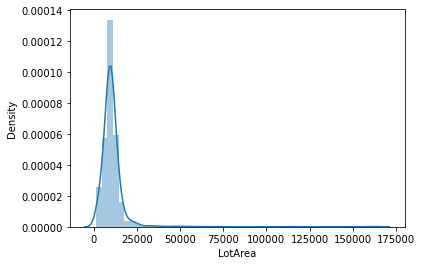

In [195]:
sns.distplot(train['LotArea'])

<AxesSubplot:xlabel='LotArea'>

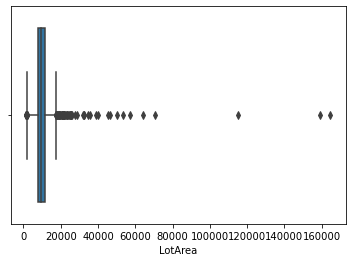

In [196]:
sns.boxplot(train['LotArea'])

In [197]:
test['LotArea'].describe()

count       292.000000
mean      10645.143836
std       13330.669795
min        1526.000000
25%        7200.000000
50%        9200.000000
75%       11658.750000
max      215245.000000
Name: LotArea, dtype: float64

<AxesSubplot:xlabel='LotArea', ylabel='Density'>

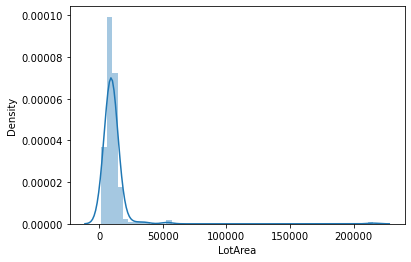

In [198]:
sns.distplot(test['LotArea'])

<AxesSubplot:xlabel='LotArea'>

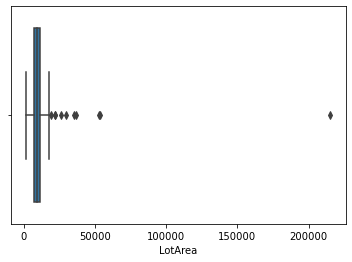

In [199]:
sns.boxplot(test['LotArea'])

In [200]:
outlier_IQR3(train,'LotArea')

(-4060.5, 23197.5)

In [201]:
train[train['LotArea']>23197.5].shape

(29, 49)

In [202]:
train = train[train['LotArea']<=23197.5]

In [203]:
outlier_IQR3(test,'LotArea')

(-6176.25, 25035.0)

In [204]:
test[test['LotArea']>25035.0].shape

(7, 48)

In [205]:
test = test[test['LotArea']<=25035.0]

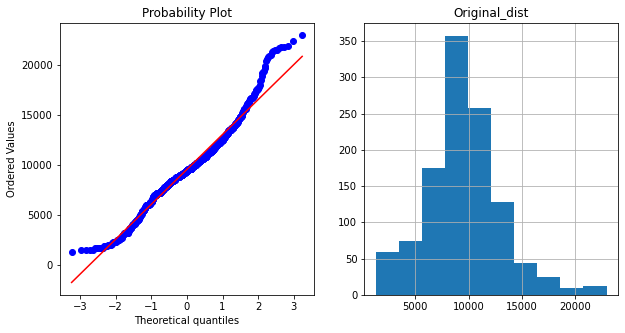

In [206]:
original_dist(train,'LotArea')

In [207]:
train['LotArea'].skew()

0.4553883862624559

In [208]:
test['LotArea'].skew()

0.2703897556584164

## BsmtFinSF1

In [209]:
train['BsmtFinSF1'].describe()

count    1139.000000
mean      431.845478
std       428.806056
min         0.000000
25%         0.000000
50%       380.000000
75%       704.500000
max      2188.000000
Name: BsmtFinSF1, dtype: float64

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='Density'>

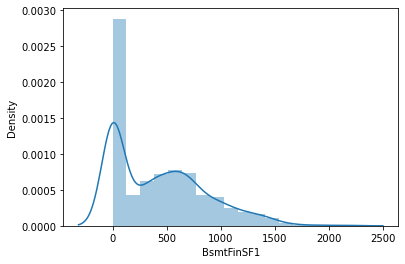

In [210]:
sns.distplot(train['BsmtFinSF1'])

<AxesSubplot:xlabel='BsmtFinSF1'>

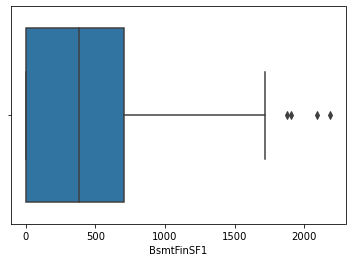

In [211]:
sns.boxplot(train['BsmtFinSF1'])

In [212]:
test['BsmtFinSF1'].describe()

count     285.000000
mean      424.933333
std       422.904934
min         0.000000
25%         0.000000
50%       348.000000
75%       686.000000
max      1767.000000
Name: BsmtFinSF1, dtype: float64

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='Density'>

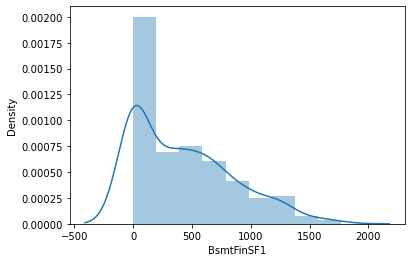

In [213]:
sns.distplot(test['BsmtFinSF1'])

<AxesSubplot:xlabel='BsmtFinSF1'>

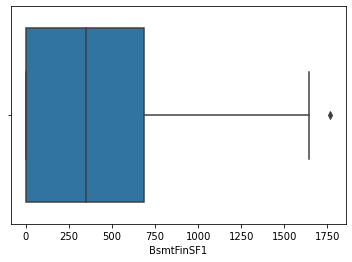

In [214]:
sns.boxplot(test['BsmtFinSF1'])

In [215]:
outlier_IQR(train, 'BsmtFinSF1')

(-1056.75, 1761.25)

In [216]:
train[train['BsmtFinSF1']>1761.25].shape

(4, 49)

In [217]:
train = train[train['BsmtFinSF1']<=1761.25]

In [218]:
train['BsmtFinSF1'].skew()

0.6865136037352014

In [219]:
outlier_IQR3(test, 'BsmtFinSF1')

(-2058.0, 2744.0)

In [220]:
train[train['BsmtFinSF1']>2744.0].shape

(0, 49)

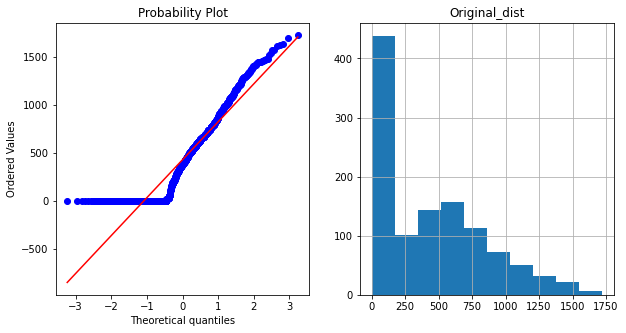

In [221]:
original_dist(train,'BsmtFinSF1')

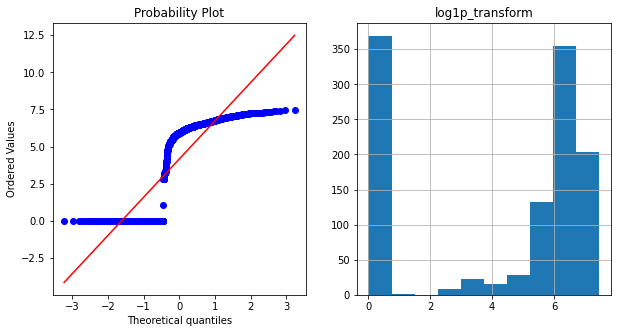

In [222]:
log1p_transform(train,'BsmtFinSF1')

In [223]:
train['BsmtFinSF1'] = np.log1p(train['BsmtFinSF1'])
train['BsmtFinSF1'].skew()

-0.591002378286244

In [224]:
test['BsmtFinSF1'].skew()

0.7952416598981878

In [225]:
test['BsmtFinSF1'] = np.log1p(test['BsmtFinSF1'])

test['BsmtFinSF1'].skew()

-0.6324885290630845

## BsmtUnfSF

In [226]:
train['BsmtUnfSF'].describe()

count    1135.000000
mean      573.408811
std       450.582390
min         0.000000
25%       218.500000
50%       481.000000
75%       816.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

<AxesSubplot:xlabel='BsmtUnfSF', ylabel='Density'>

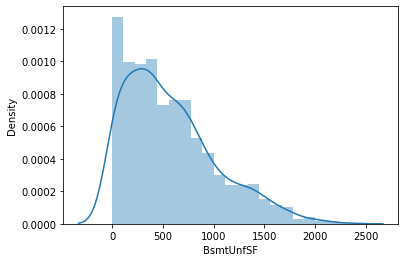

In [227]:
sns.distplot(train['BsmtUnfSF'])

<AxesSubplot:xlabel='BsmtUnfSF'>

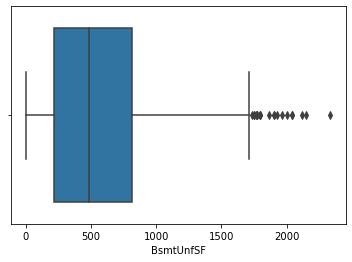

In [228]:
sns.boxplot(train['BsmtUnfSF'])

In [229]:
test['BsmtUnfSF'].describe()

count     285.000000
mean      561.329825
std       413.728831
min         0.000000
25%       256.000000
50%       490.000000
75%       783.000000
max      1935.000000
Name: BsmtUnfSF, dtype: float64

<AxesSubplot:xlabel='BsmtUnfSF', ylabel='Density'>

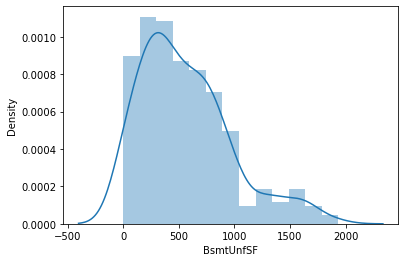

In [230]:
sns.distplot(test['BsmtUnfSF'])

<AxesSubplot:xlabel='BsmtUnfSF'>

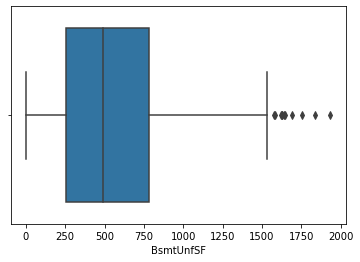

In [231]:
sns.boxplot(test['BsmtUnfSF'])

In [232]:
outlier_IQR(train,'BsmtUnfSF')

(-677.75, 1712.25)

In [233]:
train[train['BsmtUnfSF']>1712.25].shape

(20, 49)

In [234]:
train = train[train['BsmtUnfSF']<=1712.25]

In [235]:
train['BsmtUnfSF'].skew()

0.7168014054318851

In [236]:
outlier_IQR3(test,'BsmtUnfSF')

(-1325.0, 2364.0)

In [237]:
test[test['BsmtUnfSF']>2364.0].shape

(0, 48)

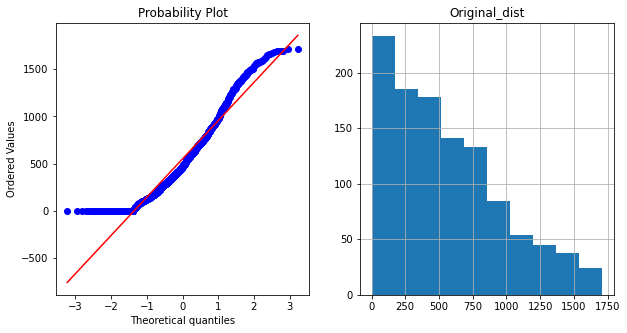

In [238]:
original_dist(train, 'BsmtUnfSF')

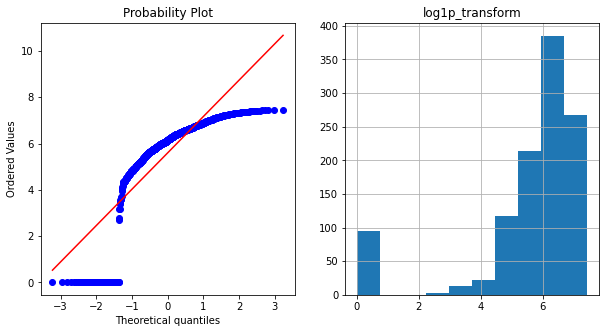

In [239]:
log1p_transform(train, 'BsmtUnfSF')

In [240]:
train['BsmtUnfSF'].skew()

0.7168014054318851

In [241]:
test['BsmtUnfSF'].skew()

0.944463690512417

## TotalBsmtSF

In [242]:
train['TotalBsmtSF'].describe()

count    1115.000000
mean     1028.368610
std       387.131287
min         0.000000
25%       793.500000
50%       981.000000
75%      1254.500000
max      3206.000000
Name: TotalBsmtSF, dtype: float64

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Density'>

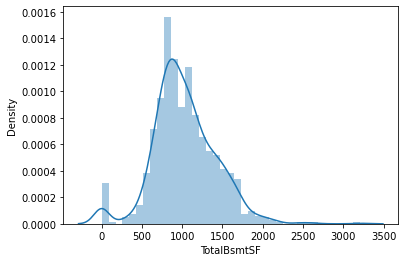

In [243]:
sns.distplot(train['TotalBsmtSF'])

<AxesSubplot:xlabel='TotalBsmtSF'>

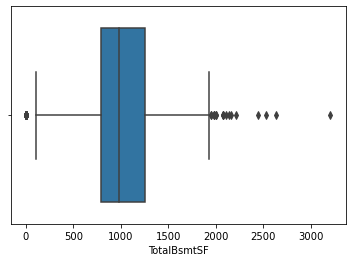

In [244]:
sns.boxplot(train['TotalBsmtSF'])

In [245]:
test['TotalBsmtSF'].describe()

count     285.000000
mean     1030.677193
std       419.206420
min         0.000000
25%       768.000000
50%       955.000000
75%      1297.000000
max      3094.000000
Name: TotalBsmtSF, dtype: float64

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Density'>

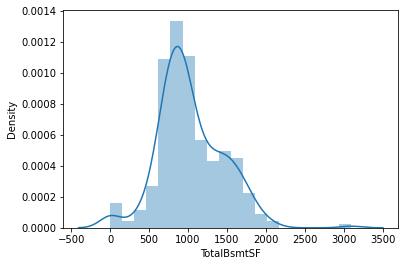

In [246]:
sns.distplot(test['TotalBsmtSF'])

<AxesSubplot:xlabel='TotalBsmtSF'>

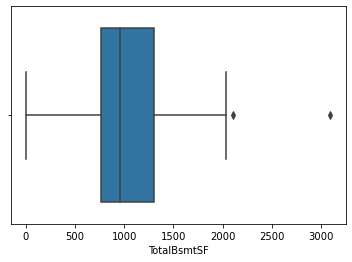

In [247]:
sns.boxplot(test['TotalBsmtSF'])

In [248]:
outlier_IQR3(train,'TotalBsmtSF')

(-589.5, 2637.5)

In [249]:
train[train['TotalBsmtSF']>2637.5].shape

(1, 49)

In [250]:
train = train[train['TotalBsmtSF']<=2637.5]

In [251]:
train['TotalBsmtSF'].skew()

0.1823939033973477

In [252]:
outlier_IQR3(test,'TotalBsmtSF')

(-819.0, 2884.0)

In [253]:
test[test['TotalBsmtSF']>2884.0].shape

(1, 48)

In [254]:
test = test[test['TotalBsmtSF']<=2884.0]

In [255]:
test['TotalBsmtSF'].skew()

0.1907598678814656

All good with this column

## 2ndFlrSF

In [256]:
train['2ndFlrSF'].describe()

count    1114.000000
mean      349.243268
std       433.437327
min         0.000000
25%         0.000000
50%         0.000000
75%       729.000000
max      1872.000000
Name: 2ndFlrSF, dtype: float64

<AxesSubplot:xlabel='2ndFlrSF', ylabel='Density'>

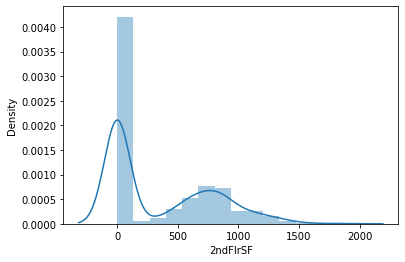

In [257]:
sns.distplot(train['2ndFlrSF'])

<AxesSubplot:xlabel='2ndFlrSF'>

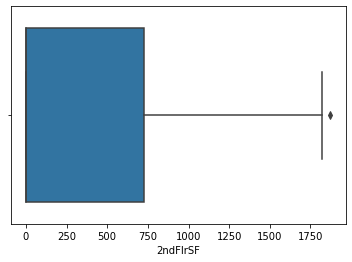

In [258]:
sns.boxplot(train['2ndFlrSF'])

In [259]:
test['2ndFlrSF'].describe()

count     284.000000
mean      332.975352
std       415.659316
min         0.000000
25%         0.000000
50%         0.000000
75%       712.500000
max      1519.000000
Name: 2ndFlrSF, dtype: float64

<AxesSubplot:xlabel='2ndFlrSF', ylabel='Density'>

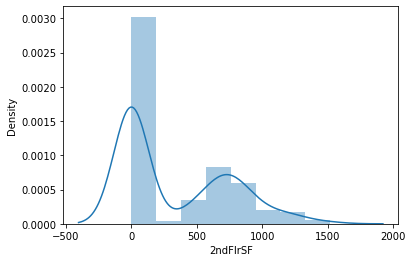

In [260]:
sns.distplot(test['2ndFlrSF'])

<AxesSubplot:xlabel='2ndFlrSF'>

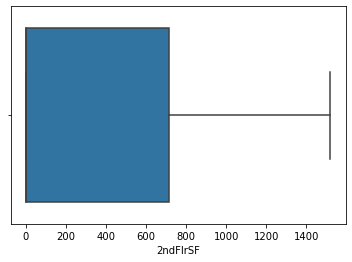

In [261]:
sns.boxplot(test['2ndFlrSF'])

In [262]:
train['2ndFlrSF'] = np.log1p(train['2ndFlrSF'])
train['2ndFlrSF'].skew()

0.2685409952651283

In [263]:
test['2ndFlrSF'] = np.log1p(test['2ndFlrSF'])
test['2ndFlrSF'].skew()

0.29991998398300135

## GrLivArea

In [264]:
train['GrLivArea'].describe()

count    1114.000000
mean     1493.361759
std       484.617995
min       334.000000
25%      1131.000000
50%      1442.000000
75%      1751.500000
max      4316.000000
Name: GrLivArea, dtype: float64

<AxesSubplot:xlabel='GrLivArea', ylabel='Density'>

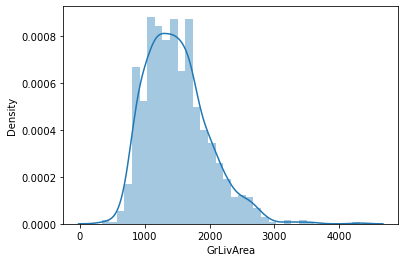

In [265]:
sns.distplot(train['GrLivArea'])

<AxesSubplot:xlabel='GrLivArea'>

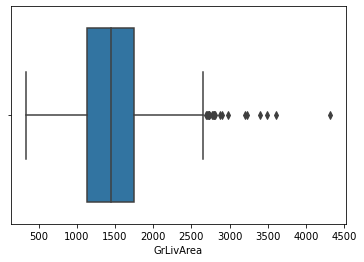

In [266]:
sns.boxplot(train['GrLivArea'])

In [267]:
test['GrLivArea'].describe()

count     284.000000
mean     1458.119718
std       500.715537
min       520.000000
25%      1059.250000
50%      1427.500000
75%      1711.000000
max      3447.000000
Name: GrLivArea, dtype: float64

<AxesSubplot:xlabel='GrLivArea', ylabel='Density'>

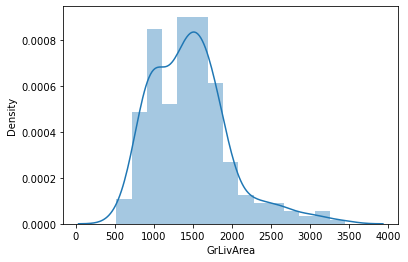

In [268]:
sns.distplot(test['GrLivArea'])

<AxesSubplot:xlabel='GrLivArea'>

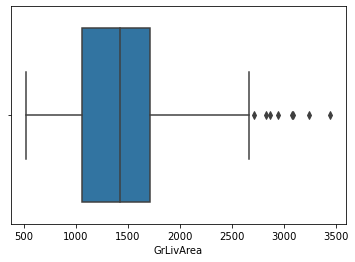

In [269]:
sns.boxplot(test['GrLivArea'])

In [270]:
outlier_IQR(train,'GrLivArea')

(200.25, 2682.25)

In [271]:
train[train['GrLivArea']>2682.25].shape

(20, 49)

In [272]:
train = train[train['GrLivArea']<=2682.25]

In [273]:
train['GrLivArea'].skew()

0.4543836776825794

In [274]:
outlier_IQR(test,'GrLivArea')

(81.625, 2688.625)

In [275]:
test[test['GrLivArea']>2682.625].shape

(8, 48)

In [276]:
test = test[test['GrLivArea']<=2682.625]

In [277]:
test['GrLivArea'].skew()

0.4565884086581795

## WoodDeckSF

In [278]:
train['WoodDeckSF'].describe()

count    1094.000000
mean       91.304388
std       119.026847
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       736.000000
Name: WoodDeckSF, dtype: float64

<AxesSubplot:xlabel='WoodDeckSF', ylabel='Density'>

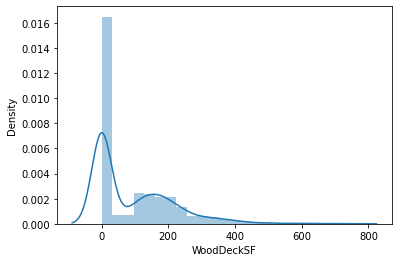

In [279]:
sns.distplot(train['WoodDeckSF'])

<AxesSubplot:xlabel='WoodDeckSF'>

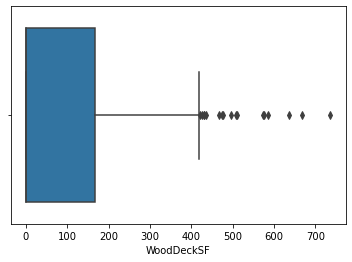

In [280]:
sns.boxplot(train['WoodDeckSF'])

In [281]:
test['WoodDeckSF'].describe()

count    276.000000
mean      81.721014
std      119.415752
min        0.000000
25%        0.000000
50%        0.000000
75%      144.250000
max      728.000000
Name: WoodDeckSF, dtype: float64

<AxesSubplot:xlabel='WoodDeckSF', ylabel='Density'>

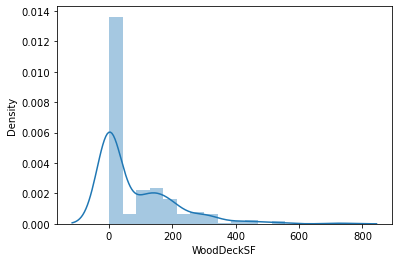

In [282]:
sns.distplot(test['WoodDeckSF'])

<AxesSubplot:xlabel='WoodDeckSF'>

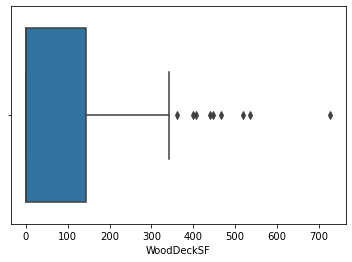

In [283]:
sns.boxplot(test['WoodDeckSF'])

In [284]:
outlier_IQR3(train,'WoodDeckSF')

(-504.0, 672.0)

In [285]:
train[train['WoodDeckSF']>672.0].shape

(1, 49)

In [286]:
train = train[train['WoodDeckSF']<=672.0]

In [287]:
train['WoodDeckSF'].skew()

1.3106182571910907

In [288]:
train['WoodDeckSF'] = np.log1p(train['WoodDeckSF'])
train['WoodDeckSF'].skew()

0.1554293567793472

In [289]:
outlier_IQR3(test,'WoodDeckSF')

(-432.75, 577.0)

In [290]:
test[test['WoodDeckSF']>577.0].shape

(1, 48)

In [291]:
test = test[test['WoodDeckSF']<=577.0]

In [292]:
test['WoodDeckSF'].skew()

1.5198707003799472

In [293]:
test['WoodDeckSF'] = np.log1p(test['WoodDeckSF'])
test['WoodDeckSF'].skew()

0.31967232319324784

## OpenPorchSF

In [294]:
train['OpenPorchSF'].describe()

count    1093.000000
mean       43.805124
std        61.668420
min         0.000000
25%         0.000000
50%        22.000000
75%        64.000000
max       523.000000
Name: OpenPorchSF, dtype: float64

<AxesSubplot:xlabel='OpenPorchSF', ylabel='Density'>

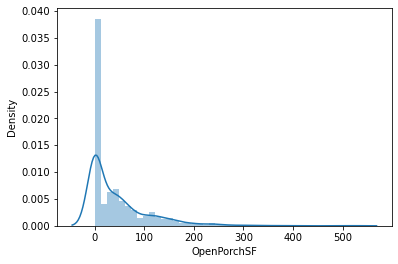

In [295]:
sns.distplot(train['OpenPorchSF'])

<AxesSubplot:xlabel='OpenPorchSF'>

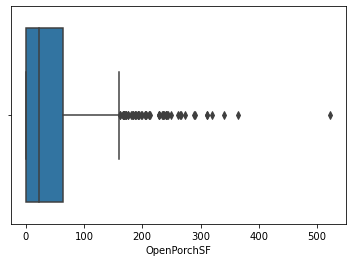

In [296]:
sns.boxplot(train['OpenPorchSF'])

In [297]:
test['OpenPorchSF'].describe()

count    275.000000
mean      45.065455
std       64.333212
min        0.000000
25%        0.000000
50%       28.000000
75%       64.000000
max      418.000000
Name: OpenPorchSF, dtype: float64

<AxesSubplot:xlabel='OpenPorchSF', ylabel='Density'>

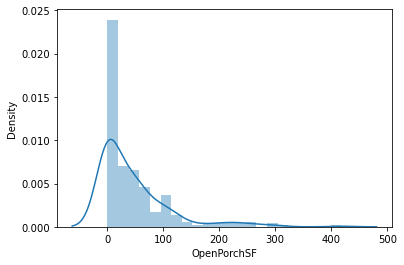

In [298]:
sns.distplot(test['OpenPorchSF'])

<AxesSubplot:xlabel='OpenPorchSF'>

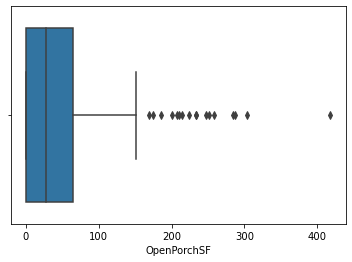

In [299]:
sns.boxplot(test['OpenPorchSF'])

In [300]:
outlier_IQR3(train,'OpenPorchSF')

(-192.0, 256.0)

In [301]:
train[train['OpenPorchSF']>256].shape

(12, 49)

In [302]:
train = train[train['OpenPorchSF']<=256]

In [303]:
train['OpenPorchSF'].skew()

1.5188926386892916

In [304]:
train['OpenPorchSF'] = np.log1p(train['OpenPorchSF'])
train['OpenPorchSF'].skew()

0.034572682458867056

In [305]:
outlier_IQR3(test,'OpenPorchSF')

(-192.0, 256.0)

In [306]:
test[test['OpenPorchSF']>256].shape

(5, 48)

In [307]:
test = test[test['OpenPorchSF']<=256]

In [308]:
test['OpenPorchSF'].skew()

1.774446119284969

In [309]:
test['OpenPorchSF'] = np.log1p(test['OpenPorchSF'])
test['OpenPorchSF'].skew()

-0.0450116084181037

## LotFrontage

In [310]:
train['LotFrontage'].describe()

count    1081.000000
mean       69.488239
std        19.039517
min        21.000000
25%        60.000000
50%        70.988470
75%        78.000000
max       182.000000
Name: LotFrontage, dtype: float64

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

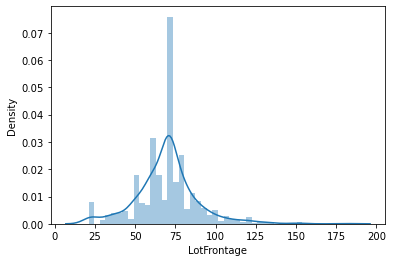

In [311]:
sns.distplot(train['LotFrontage'])

<AxesSubplot:xlabel='LotFrontage'>

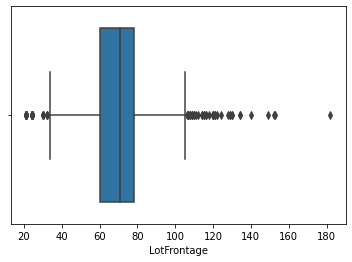

In [312]:
sns.boxplot(train['LotFrontage'])

In [313]:
test['LotFrontage'].describe()

count    270.000000
mean      65.770385
std       18.993248
min       21.000000
25%       58.000000
50%       66.425101
75%       75.000000
max      137.000000
Name: LotFrontage, dtype: float64

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

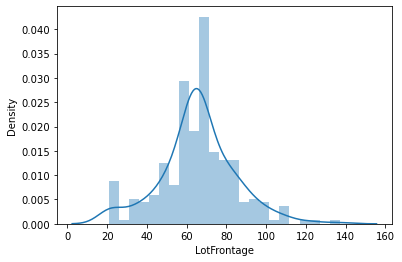

In [314]:
sns.distplot(test['LotFrontage'])

<AxesSubplot:xlabel='LotFrontage'>

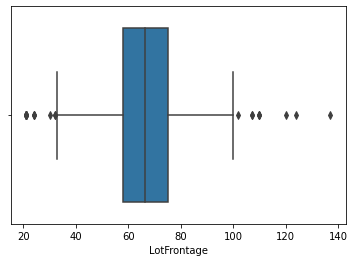

In [315]:
sns.boxplot(test['LotFrontage'])

In [316]:
outlier_IQR3(train,'LotFrontage')

(6.0, 132.0)

In [317]:
train[train['OpenPorchSF']>132].shape

(0, 49)

In [318]:
train['OpenPorchSF'].skew()

0.034572682458867056

In [319]:
outlier_IQR3(test,'LotFrontage')

(7.0, 126.0)

In [320]:
test[test['OpenPorchSF']>126].shape

(0, 48)

In [321]:
test['OpenPorchSF'].skew()

-0.0450116084181037

## MasVnrArea

In [322]:
train['MasVnrArea'].describe()

count    1081.000000
mean       92.563238
std       162.750758
min         0.000000
25%         0.000000
50%         0.000000
75%       143.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

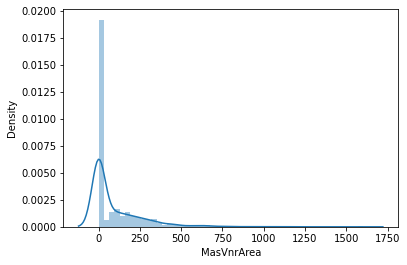

In [323]:
sns.distplot(train['MasVnrArea'])

<AxesSubplot:xlabel='MasVnrArea'>

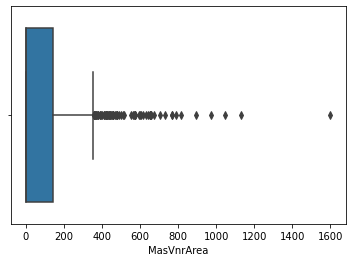

In [324]:
sns.boxplot(train['MasVnrArea'])

In [325]:
test['MasVnrArea'].describe()

count    270.000000
mean      97.493229
std      156.551421
min        0.000000
25%        0.000000
50%        0.000000
75%      168.250000
max      921.000000
Name: MasVnrArea, dtype: float64

<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

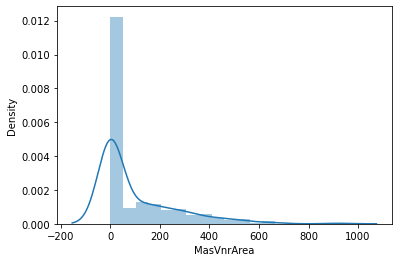

In [326]:
sns.distplot(test['MasVnrArea'])

<AxesSubplot:xlabel='MasVnrArea'>

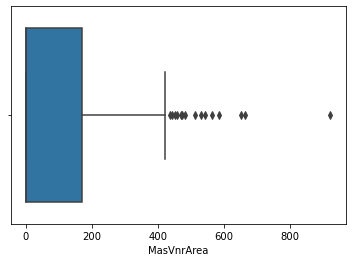

In [327]:
sns.boxplot(test['MasVnrArea'])

In [328]:
outlier_IQR3(train,'MasVnrArea')

(-429.0, 572.0)

In [329]:
train[train['MasVnrArea']>572.0].shape

(25, 49)

In [330]:
train = train[train['MasVnrArea']<=572.0]

In [331]:
train['MasVnrArea'].skew()

1.6414199307568578

In [332]:
train['MasVnrArea'] = np.log1p(train['MasVnrArea'])
train['MasVnrArea'].skew()

0.5644284568051061

In [333]:
outlier_IQR3(test,'MasVnrArea')

(-504.75, 673.0)

In [334]:
test[test['MasVnrArea']>673.0].shape

(1, 48)

In [335]:
test = test[test['MasVnrArea']<=673.0]

In [336]:
test['MasVnrArea'].skew()

1.6467543381224494

In [337]:
test['MasVnrArea'] = np.log1p(test['MasVnrArea'])
test['MasVnrArea'].skew()

0.4785261165248398

In [338]:
x = train.drop('SalePrice', axis=1)
y = train['SalePrice']

In [339]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)
test = ss.fit_transform(test)

# MODEL BUILDING

## Finding the best random state for the model

In [340]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [341]:
maxAccu = 0
maxRS = 0

for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accu = r2_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.9082648910911271 on random state 136


So the best random state would be 136.

In [342]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=136)

In [343]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(lr.score(x_train,y_train))

mean_squared_error: 367798171.32508576
mean_absolute_error: 14866.752869699878
r2_score: 0.9082648910911271
0.8841320706594387


In [344]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(dt.score(x_train,y_train))

mean_squared_error: 1063777797.1886792
mean_absolute_error: 24629.094339622643
r2_score: 0.7346757551067556
1.0


In [345]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(rf.score(x_train,y_train))

mean_squared_error: 419528553.2365239
mean_absolute_error: 14664.641556603772
r2_score: 0.8953624554932378
0.9817971516506855


In [346]:
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)
pred = kn.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(kn.score(x_train,y_train))

mean_squared_error: 543940428.6177359
mean_absolute_error: 17338.88679245283
r2_score: 0.864332021338183
0.8721631300218455


In [347]:
sv = SVR()
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(sv.score(x_train,y_train))

mean_squared_error: 4288324026.0754223
mean_absolute_error: 49090.28388809399
r2_score: -0.06958082513373909
-0.033416380301477755


In [348]:
ab = AdaBoostRegressor()
ab.fit(x_train,y_train)
pred=ab.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(ab.score(x_train,y_train))

mean_squared_error: 505048621.21500236
mean_absolute_error: 16952.169429331883
r2_score: 0.8740322984627238
0.881219848216295


In [349]:
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(gb.score(x_train,y_train))

mean_squared_error: 352236631.35993814
mean_absolute_error: 13291.779388176512
r2_score: 0.9121462033835441
0.9626058793965838


Clearly, Random forest Regression and Gradient Boosting Regression has the best perfomance. Let's Crossvalidate.

## Crossvalidation

In [350]:
from sklearn.model_selection import cross_val_score

In [351]:
lrc = cross_val_score(lr, x, y, cv=5)

print("Cross validation score of Linear Regression:", lrc.mean())

Cross validation score of Linear Regression: 0.8739461463433742


In [352]:
rfc = cross_val_score(rf, x, y, cv=5)

print("Cross validation score of Random Forest:", rfc.mean())

Cross validation score of Random Forest: 0.8738586288235076


In [353]:
dtc = cross_val_score(dt, x, y, cv=5)

print("Cross validation score of Decision Tree :", dtc.mean())

Cross validation score of Decision Tree : 0.7347928822007874


In [354]:
knc = cross_val_score(kn, x, y, cv=5)

print("Cross validation score of Kneigbors:", knc.mean())

Cross validation score of Kneigbors: 0.8098421478975016


In [355]:
svc1 = cross_val_score(sv, x, y, cv=5)

print("Cross validation score of Support Vector:", svc1.mean())

Cross validation score of Support Vector: -0.04926546624825749


In [356]:
adr = cross_val_score(ab, x, y, cv=5)

print("Cross validation score of AdaBoost:", adr.mean())

Cross validation score of AdaBoost: 0.8386100647032059


In [357]:
gbr = cross_val_score(gb, x, y, cv=5)

print("Cross validation score of GradientBoost:", gbr.mean())

Cross validation score of GradientBoost: 0.889039460318626


Both RandomForest and GradientBoosting Regression perfomred well.

## Hyperparameter Tuning with RandomForest Regression

In [358]:
from sklearn.model_selection import RandomizedSearchCV

In [359]:
#Creating parameter list to pass in RandomizedSearchCV

parameters = {'n_estimators':[10,50,100,150], 'max_depth': np.arange(2,10),
             'criterion':['mse','mae'], 'max_features':['auto','sqrt', 'log2']}

In [360]:
GCV = RandomizedSearchCV(RandomForestRegressor(), parameters, cv=5)
GCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [10, 50, 100, 150]})

In [361]:
#Printing the best parameters.
GCV.best_params_

{'n_estimators': 100,
 'max_features': 'auto',
 'max_depth': 9,
 'criterion': 'mae'}

## Model with RandomForest Regression

In [362]:
model = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=8, max_features='sqrt')
model.fit(x_train,y_train)
pred = model.predict(test)
print(model.score(x_train,y_train)*100)

95.26744447522161


## Hyperparameter Tuning with Gradient Boosting Regression

In [363]:
#Creating parameter list to pass in RandomizedSearchCV

parameters = {'n_estimators':[10,50,100,150], 'max_depth': np.arange(2,10),
             'criterion':['friedman_mse','mse','mae'], 'max_features':['auto','sqrt', 'log2'],
              'loss':['ls', 'lad', 'huber', 'quantile']}

In [364]:
GCV = RandomizedSearchCV(GradientBoostingRegressor(), parameters, cv=5)
GCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'loss': ['ls', 'lad', 'huber',
                                                 'quantile'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [10, 50, 100, 150]})

In [365]:
#Printing the best parameters.
GCV.best_params_

{'n_estimators': 150,
 'max_features': 'log2',
 'max_depth': 7,
 'loss': 'huber',
 'criterion': 'mae'}

## Model with Gradient Boosting  Regression

In [366]:
model1 = GradientBoostingRegressor(n_estimators=100, criterion='friedman_mse', max_depth=5, max_features='sqrt',loss='huber')
model1.fit(x_train,y_train)
pred1 = model1.predict(test)
print(model1.score(x_train,y_train)*100)

97.75098852594361


We will save model with Gradient Boosting Regression

# SAVING THE MODEL

In [367]:
import joblib
joblib.dump(model1,"housing_projectt_submission.pkl")

['housing_projectt_submission.pkl']

In [368]:
submission_prices = pd.DataFrame(pred1)

housing_projectt_submission.pkl would be the model.<br>
submission_prices would be the prediction for houses.

In [370]:
submission_prices.head()

0
0  330306.022231
1  172055.512201
2  261404.530075
3  180802.465723
4  221865.026825